In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.plots import *

In [3]:
PATH = 'data/whale/'

In [4]:
! ls {PATH}

merged_data	       subm	 train	     train_safe2
new		       test	 train.csv   train_safe3
sample		       test.zip  train_orig  train.zip
sample_submission.csv  tmp	 train_safe  validation_data


In [5]:
files = os.listdir(f'{PATH}train/1')[:15]
files

['4a880271.jpg',
 'a1f3adf5.jpg',
 'aa0f8bf4.jpg',
 '416ccbf3.jpg',
 '3b52038b.jpg',
 '4bb233c0.jpg',
 '8614219d.jpg',
 '7589c959.jpg',
 'ea999934.jpg',
 'bd2ac14a.jpg',
 'f8201d24.jpg',
 '45880deb.jpg',
 '67758056.jpg',
 'fa393b35.jpg',
 'a9f2532a.jpg']

In [6]:
def get_1st(path): return glob(f'{path}/*.*')[0]

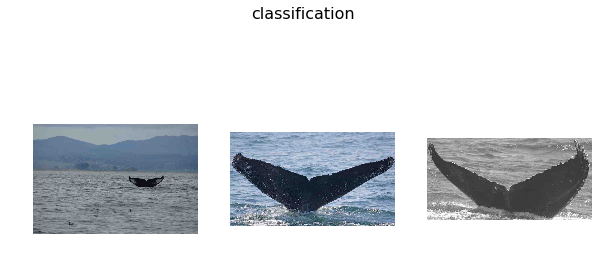

In [7]:
list_paths = [f"{PATH}train/1/45880deb.jpg", f"{PATH}test/03c6c2eb.jpg", f"{PATH}test/d7531cbd.jpg"]
plots_from_files(list_paths, maintitle="classification")

In [8]:
label_df = pd.read_csv(f'{PATH}/train.csv')
label_df.head(5)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [9]:
label_df.Id

0       w_e15442c
1       w_1287fbc
2       w_da2efe0
3       w_19e5482
4       w_f22f3e3
5       w_8b1ca89
6       w_eaad6a8
7       new_whale
8       w_3d0bc7a
9       w_50db782
10      w_2863d51
11      w_6dc7db6
12      w_968f2ca
13      w_fd1cb9d
14      w_60759c2
15      w_ab6bb0a
16      w_79b42cd
17      w_c9ba30c
18      w_e6ec8ee
19      new_whale
20      new_whale
21      w_7e5cc5e
22      w_ab6db0f
23      w_bc8d634
24      w_b59c523
25      w_2850471
26      new_whale
27      w_51969d2
28      w_4be8a3e
29      w_c0cfd5b
          ...    
9820    new_whale
9821    w_8ba2066
9822    w_6734e40
9823    w_f5eb6c6
9824    w_9d5f5cc
9825    w_a16b600
9826    w_2d99a0c
9827    w_f3bd33a
9828    w_17ee910
9829    w_4f0676a
9830    w_b426ff3
9831    w_41afa58
9832    w_0f20cbc
9833    w_372ae75
9834    w_eb0a6ed
9835    w_edf5f77
9836    w_89d9c03
9837    new_whale
9838    w_a190b3b
9839    w_73b26b7
9840    w_ace8c54
9841    w_fce6ab2
9842    w_41a260a
9843    w_6249155
9844    ne

In [10]:
pivot_df = label_df.pivot_table(index = 'Id', aggfunc=len).sort_values('Image', ascending = False)
pivot_df

,Image
Id,
new_whale,810
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
w_fd1cb9d,22
w_ab4cae2,22
w_693c9ee,22
w_987a36f,21


In [11]:
print (pivot_df.loc['w_1287fbc'])
print (pivot_df.iloc[1])

Image    34
Name: w_1287fbc, dtype: int64
Image    34
Name: w_1287fbc, dtype: int64


In [12]:
pivot_df1 = pivot_df[pivot_df.Image > 5]
pivot_df2 = pivot_df[(pivot_df.Image <= 5) & (pivot_df.Image > 1)]
pivot_df3 = pivot_df[pivot_df.Image == 1]

In [13]:
labels_csv = f'{PATH}/train.csv'
n = len(list(open(labels_csv))) - 1
val_idx = get_cv_idxs(n)

In [17]:
def get_augs():
    data = ImageClassifierData.from_csv(PATH, 'train/1', labels_csv, bs=2, tfms=tfms, test_name = 'test')
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

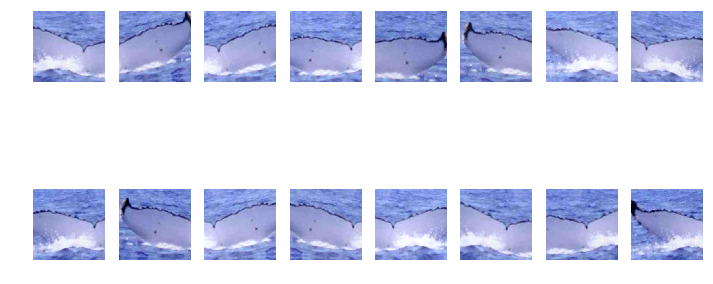

In [18]:
ims = np.stack([get_augs() for i in range(16)])
plots(ims, rows=2)

In [56]:
# Converting to keras style folder hierarchy
import os.path

for i in range(0, len(label_df)):
    print (i)
    print (label_df.Image[i])
    print (label_df.Id[i])
    print (f'{PATH}train_safe/'+ label_df.Id[i])
    
    if not os.path.exists(f'{PATH}train_safe/'+ label_df.Id[i]):
        os.makedirs(f'{PATH}train_safe/'+ label_df.Id[i])
    if os.path.isfile(f'{PATH}train_safe/train/'+ label_df.Image[i]):
        os.rename(f'{PATH}train_safe/train/'+ label_df.Image[i], f'{PATH}train_safe/'+ label_df.Id[i] +'/'+ label_df.Image[i])
        print(os.path.isfile(f'{PATH}train_safe/'+ label_df.Id[i] +'/'+ label_df.Image[i]))

0
00022e1a.jpg
w_e15442c
data/whale/train_safe/w_e15442c
1
000466c4.jpg
w_1287fbc
data/whale/train_safe/w_1287fbc
2
00087b01.jpg
w_da2efe0
data/whale/train_safe/w_da2efe0
3
001296d5.jpg
w_19e5482
data/whale/train_safe/w_19e5482
4
0014cfdf.jpg
w_f22f3e3
data/whale/train_safe/w_f22f3e3
5
0025e8c2.jpg
w_8b1ca89
data/whale/train_safe/w_8b1ca89
6
0026a8ab.jpg
w_eaad6a8
data/whale/train_safe/w_eaad6a8
7
0031c258.jpg
new_whale
data/whale/train_safe/new_whale
8
0035632e.jpg
w_3d0bc7a
data/whale/train_safe/w_3d0bc7a
9
0037e7d3.jpg
w_50db782
data/whale/train_safe/w_50db782
10
00389cd7.jpg
w_2863d51
data/whale/train_safe/w_2863d51
11
0042dcc4.jpg
w_6dc7db6
data/whale/train_safe/w_6dc7db6
12
0042ea34.jpg
w_968f2ca
data/whale/train_safe/w_968f2ca
13
00467ae9.jpg
w_fd1cb9d
data/whale/train_safe/w_fd1cb9d
14
004a97f3.jpg
w_60759c2
data/whale/train_safe/w_60759c2
15
004c5fb9.jpg
w_ab6bb0a
data/whale/train_safe/w_ab6bb0a
16
005c57e7.jpg
w_79b42cd
data/whale/train_safe/w_79b42cd
17
006d0aaf.jpg
w_c9ba30

293
06e622e0.jpg
new_whale
data/whale/train_safe/new_whale
294
06e8a669.jpg
w_d1bbde9
data/whale/train_safe/w_d1bbde9
295
06ed0f2e.jpg
w_ff7630a
data/whale/train_safe/w_ff7630a
296
06f3adae.jpg
w_98baff9
data/whale/train_safe/w_98baff9
297
06f3cbf8.jpg
w_fc433f7
data/whale/train_safe/w_fc433f7
298
06ffe77b.jpg
w_6ba46a1
data/whale/train_safe/w_6ba46a1
299
0701d937.jpg
w_fcdc898
data/whale/train_safe/w_fcdc898
300
0705d206.jpg
w_f63d8b0
data/whale/train_safe/w_f63d8b0
301
070e6c95.jpg
w_15d7ecf
data/whale/train_safe/w_15d7ecf
302
0727715c.jpg
w_aa7a302
data/whale/train_safe/w_aa7a302
303
0739fcdc.jpg
w_1917275
data/whale/train_safe/w_1917275
304
0745ef3f.jpg
w_18a1bf2
data/whale/train_safe/w_18a1bf2
305
07480326.jpg
w_989fbbb
data/whale/train_safe/w_989fbbb
306
0749d9c2.jpg
w_71c7322
data/whale/train_safe/w_71c7322
307
074ceb3f.jpg
w_0b3b659
data/whale/train_safe/w_0b3b659
308
074f068b.jpg
w_d96a0cd
data/whale/train_safe/w_d96a0cd
309
0753654f.jpg
w_2e42cc0
data/whale/train_safe/w_2e42c

608
0f611096.jpg
w_1c32062
data/whale/train_safe/w_1c32062
609
0f6f6880.jpg
w_699be3a
data/whale/train_safe/w_699be3a
610
0f776f50.jpg
w_8507226
data/whale/train_safe/w_8507226
611
0f8136f0.jpg
w_fe36b07
data/whale/train_safe/w_fe36b07
612
0f83217e.jpg
w_42c631a
data/whale/train_safe/w_42c631a
613
0f86a67d.jpg
w_2282bb8
data/whale/train_safe/w_2282bb8
614
0f93f54c.jpg
w_d4bc10d
data/whale/train_safe/w_d4bc10d
615
0fa288cf.jpg
new_whale
data/whale/train_safe/new_whale
616
0fa2da8f.jpg
w_97f5054
data/whale/train_safe/w_97f5054
617
0fb2525d.jpg
w_0ee4d6d
data/whale/train_safe/w_0ee4d6d
618
0fb4c4dd.jpg
w_d51a79f
data/whale/train_safe/w_d51a79f
619
0fb6482b.jpg
new_whale
data/whale/train_safe/new_whale
620
0fb7d824.jpg
w_cf69291
data/whale/train_safe/w_cf69291
621
0fbba784.jpg
w_690fc6b
data/whale/train_safe/w_690fc6b
622
0fbc91d1.jpg
w_d5ec83f
data/whale/train_safe/w_d5ec83f
623
0fc49194.jpg
w_515838e
data/whale/train_safe/w_515838e
624
0fc584fc.jpg
w_a14ccaa
data/whale/train_safe/w_a14cc

data/whale/train_safe/w_e156c87
1002
195cbb6e.jpg
new_whale
data/whale/train_safe/new_whale
1003
195db58f.jpg
w_ed5a7c6
data/whale/train_safe/w_ed5a7c6
1004
1961e952.jpg
w_fb4d1f1
data/whale/train_safe/w_fb4d1f1
1005
1964d85b.jpg
w_21dfc18
data/whale/train_safe/w_21dfc18
1006
196d9d20.jpg
w_861cc1c
data/whale/train_safe/w_861cc1c
1007
196ee9a2.jpg
w_ede13b5
data/whale/train_safe/w_ede13b5
1008
19746af1.jpg
w_a87ac93
data/whale/train_safe/w_a87ac93
1009
1974ae44.jpg
w_6202983
data/whale/train_safe/w_6202983
1010
198139ea.jpg
w_5966fff
data/whale/train_safe/w_5966fff
1011
19831cf1.jpg
w_aed1e43
data/whale/train_safe/w_aed1e43
1012
198de7b5.jpg
w_0466071
data/whale/train_safe/w_0466071
1013
1990152d.jpg
w_92d390e
data/whale/train_safe/w_92d390e
1014
19b2000c.jpg
w_86ff8a6
data/whale/train_safe/w_86ff8a6
1015
19b4298e.jpg
w_bed6af1
data/whale/train_safe/w_bed6af1
1016
19cabba3.jpg
w_b942708
data/whale/train_safe/w_b942708
1017
19ccda05.jpg
w_7759db0
data/whale/train_safe/w_7759db0
1018
19d

1364
23e0b989.jpg
w_ef30115
data/whale/train_safe/w_ef30115
1365
23e35768.jpg
w_ca1850d
data/whale/train_safe/w_ca1850d
1366
23f9ba33.jpg
w_d9aab0a
data/whale/train_safe/w_d9aab0a
1367
23fbfdbe.jpg
w_25d7f93
data/whale/train_safe/w_25d7f93
1368
240180f3.jpg
w_77e1d3f
data/whale/train_safe/w_77e1d3f
1369
24040931.jpg
w_7c2d27c
data/whale/train_safe/w_7c2d27c
1370
2406902f.jpg
w_deb33de
data/whale/train_safe/w_deb33de
1371
2407e5ff.jpg
w_dcd7a1d
data/whale/train_safe/w_dcd7a1d
1372
2415bfa7.jpg
w_a369ccf
data/whale/train_safe/w_a369ccf
1373
241ad6d0.jpg
w_2d99a0c
data/whale/train_safe/w_2d99a0c
1374
241c81e3.jpg
w_5dc1c2d
data/whale/train_safe/w_5dc1c2d
1375
2426615c.jpg
w_fba3bde
data/whale/train_safe/w_fba3bde
1376
2426e8c3.jpg
w_c58b474
data/whale/train_safe/w_c58b474
1377
24279318.jpg
w_43c0762
data/whale/train_safe/w_43c0762
1378
24451ede.jpg
w_35453e0
data/whale/train_safe/w_35453e0
1379
244cd83c.jpg
new_whale
data/whale/train_safe/new_whale
1380
245f7a16.jpg
w_471cca4
data/whale/t

1659
2c16e140.jpg
w_fbb485b
data/whale/train_safe/w_fbb485b
1660
2c17cb98.jpg
w_6463ce8
data/whale/train_safe/w_6463ce8
1661
2c183f20.jpg
w_1948625
data/whale/train_safe/w_1948625
1662
2c1df05d.jpg
w_41ed8e8
data/whale/train_safe/w_41ed8e8
1663
2c1efff9.jpg
w_63db6f9
data/whale/train_safe/w_63db6f9
1664
2c25e7d4.jpg
w_dfacbe7
data/whale/train_safe/w_dfacbe7
1665
2c2a4d81.jpg
w_d9aab0a
data/whale/train_safe/w_d9aab0a
1666
2c2a91c0.jpg
w_1a229eb
data/whale/train_safe/w_1a229eb
1667
2c367983.jpg
w_b7d5069
data/whale/train_safe/w_b7d5069
1668
2c3889d4.jpg
w_0f54cdf
data/whale/train_safe/w_0f54cdf
1669
2c3a88e9.jpg
w_8eb63b7
data/whale/train_safe/w_8eb63b7
1670
2c3b34a3.jpg
w_1287fbc
data/whale/train_safe/w_1287fbc
1671
2c3e707c.jpg
w_a837660
data/whale/train_safe/w_a837660
1672
2c414635.jpg
w_ba39446
data/whale/train_safe/w_ba39446
1673
2c4813a1.jpg
w_1287fbc
data/whale/train_safe/w_1287fbc
1674
2c4b238b.jpg
w_e3c119c
data/whale/train_safe/w_e3c119c
1675
2c575346.jpg
new_whale
data/whale/t

1946
32fce9b5.jpg
w_11adaae
data/whale/train_safe/w_11adaae
1947
32fec493.jpg
w_1beadba
data/whale/train_safe/w_1beadba
1948
33023e3f.jpg
w_238a4ad
data/whale/train_safe/w_238a4ad
1949
330794d8.jpg
w_f031837
data/whale/train_safe/w_f031837
1950
33080aa5.jpg
w_e7a238b
data/whale/train_safe/w_e7a238b
1951
33100a5b.jpg
w_0e737d0
data/whale/train_safe/w_0e737d0
1952
3316b37e.jpg
new_whale
data/whale/train_safe/new_whale
1953
331de7d8.jpg
w_5021993
data/whale/train_safe/w_5021993
1954
33214781.jpg
new_whale
data/whale/train_safe/new_whale
1955
3322aa7c.jpg
w_b29214f
data/whale/train_safe/w_b29214f
1956
33237217.jpg
w_bd61ca9
data/whale/train_safe/w_bd61ca9
1957
3326845f.jpg
w_8596faf
data/whale/train_safe/w_8596faf
1958
3326ead2.jpg
w_8cd6d46
data/whale/train_safe/w_8cd6d46
1959
332f1c08.jpg
w_65139e4
data/whale/train_safe/w_65139e4
1960
3332d457.jpg
w_fd1a27f
data/whale/train_safe/w_fd1a27f
1961
33374e14.jpg
w_2850471
data/whale/train_safe/w_2850471
1962
333c9ff8.jpg
w_b3cc032
data/whale/t

2394
3e4a4574.jpg
w_e63fbbe
data/whale/train_safe/w_e63fbbe
2395
3e504464.jpg
w_33fc58d
data/whale/train_safe/w_33fc58d
2396
3e50fc50.jpg
w_8db45b7
data/whale/train_safe/w_8db45b7
2397
3e51dfd8.jpg
w_b20763e
data/whale/train_safe/w_b20763e
2398
3e550c8a.jpg
w_2f6ad07
data/whale/train_safe/w_2f6ad07
2399
3e69d7da.jpg
w_2863d51
data/whale/train_safe/w_2863d51
2400
3e736af6.jpg
w_1652da1
data/whale/train_safe/w_1652da1
2401
3e7393ae.jpg
w_8de6989
data/whale/train_safe/w_8de6989
2402
3e793658.jpg
w_1d53d9c
data/whale/train_safe/w_1d53d9c
2403
3e7950d5.jpg
w_ee23a5f
data/whale/train_safe/w_ee23a5f
2404
3e799123.jpg
w_7a892ea
data/whale/train_safe/w_7a892ea
2405
3e7f4f54.jpg
w_ee17a08
data/whale/train_safe/w_ee17a08
2406
3e88c7fc.jpg
w_1c6d5f0
data/whale/train_safe/w_1c6d5f0
2407
3e91ad0d.jpg
w_8a4b8ef
data/whale/train_safe/w_8a4b8ef
2408
3e97cdda.jpg
w_329e594
data/whale/train_safe/w_329e594
2409
3e9c14ff.jpg
w_9ca943b
data/whale/train_safe/w_9ca943b
2410
3ebde372.jpg
w_8cd3036
data/whale/t

2835
4a1dee2d.jpg
w_0d48a7d
data/whale/train_safe/w_0d48a7d
2836
4a1f379f.jpg
w_b5e3076
data/whale/train_safe/w_b5e3076
2837
4a22e926.jpg
new_whale
data/whale/train_safe/new_whale
2838
4a3f0e2f.jpg
new_whale
data/whale/train_safe/new_whale
2839
4a3f5474.jpg
w_f0d8be1
data/whale/train_safe/w_f0d8be1
2840
4a4604b5.jpg
w_8a4b8ef
data/whale/train_safe/w_8a4b8ef
2841
4a4877a4.jpg
w_1609b19
data/whale/train_safe/w_1609b19
2842
4a5abae8.jpg
w_d663f4f
data/whale/train_safe/w_d663f4f
2843
4a640733.jpg
w_49bbc79
data/whale/train_safe/w_49bbc79
2844
4a87024c.jpg
w_693c9ee
data/whale/train_safe/w_693c9ee
2845
4a880271.jpg
new_whale
data/whale/train_safe/new_whale
2846
4a9213a0.jpg
new_whale
data/whale/train_safe/new_whale
2847
4a96c4f0.jpg
w_b64126b
data/whale/train_safe/w_b64126b
2848
4a97e57f.jpg
w_a29719a
data/whale/train_safe/w_a29719a
2849
4a981252.jpg
w_69e88da
data/whale/train_safe/w_69e88da
2850
4a986602.jpg
w_f87b77b
data/whale/train_safe/w_f87b77b
2851
4aa0dc25.jpg
w_3b90f9b
data/whale/t

w_b6410bc
data/whale/train_safe/w_b6410bc
3411
5888e245.jpg
w_cf092f5
data/whale/train_safe/w_cf092f5
3412
588e85d5.jpg
w_59eb8ae
data/whale/train_safe/w_59eb8ae
3413
58947d83.jpg
w_b329c00
data/whale/train_safe/w_b329c00
3414
589541a9.jpg
w_102ab59
data/whale/train_safe/w_102ab59
3415
589a4086.jpg
w_4f248f3
data/whale/train_safe/w_4f248f3
3416
58a457cf.jpg
w_dfbfe10
data/whale/train_safe/w_dfbfe10
3417
58b5e338.jpg
w_5f7c402
data/whale/train_safe/w_5f7c402
3418
58c4525e.jpg
w_540fd73
data/whale/train_safe/w_540fd73
3419
58c892d9.jpg
w_85b0d73
data/whale/train_safe/w_85b0d73
3420
58cbf22f.jpg
w_1f10750
data/whale/train_safe/w_1f10750
3421
58cd0440.jpg
w_3f550fa
data/whale/train_safe/w_3f550fa
3422
58d6988e.jpg
w_de51d16
data/whale/train_safe/w_de51d16
3423
58d7343f.jpg
w_09f9fd3
data/whale/train_safe/w_09f9fd3
3424
58e61a8a.jpg
w_e7f8e67
data/whale/train_safe/w_e7f8e67
3425
58e74dc4.jpg
w_45461e6
data/whale/train_safe/w_45461e6
3426
58f2ffb9.jpg
w_8fab53d
data/whale/train_safe/w_8fab53

69f43da5.jpg
w_0e0e856
data/whale/train_safe/w_0e0e856
4036
69f48b98.jpg
w_b4a5677
data/whale/train_safe/w_b4a5677
4037
69fd5f50.jpg
w_896d91c
data/whale/train_safe/w_896d91c
4038
6a0d8773.jpg
new_whale
data/whale/train_safe/new_whale
4039
6a0f071b.jpg
w_4072313
data/whale/train_safe/w_4072313
4040
6a179092.jpg
w_2a939eb
data/whale/train_safe/w_2a939eb
4041
6a18bd9a.jpg
w_a3c6ed0
data/whale/train_safe/w_a3c6ed0
4042
6a1979b5.jpg
w_13c6b6b
data/whale/train_safe/w_13c6b6b
4043
6a1edcf7.jpg
w_3cf3853
data/whale/train_safe/w_3cf3853
4044
6a221c3c.jpg
w_46540b1
data/whale/train_safe/w_46540b1
4045
6a28c69c.jpg
w_05567a9
data/whale/train_safe/w_05567a9
4046
6a2bcbb1.jpg
w_80c692d
data/whale/train_safe/w_80c692d
4047
6a2c31d4.jpg
w_03c84ef
data/whale/train_safe/w_03c84ef
4048
6a2f4a99.jpg
w_f6722e7
data/whale/train_safe/w_f6722e7
4049
6a3fac3f.jpg
w_50db782
data/whale/train_safe/w_50db782
4050
6a3fc79d.jpg
w_a59905f
data/whale/train_safe/w_a59905f
4051
6a5ddf81.jpg
w_0f96780
data/whale/train_

4248
6f7e4d48.jpg
w_19aeb9c
data/whale/train_safe/w_19aeb9c
4249
6f8dad75.jpg
w_d1033fa
data/whale/train_safe/w_d1033fa
4250
6f900c9a.jpg
w_0970c7f
data/whale/train_safe/w_0970c7f
4251
6f9b8294.jpg
w_43be268
data/whale/train_safe/w_43be268
4252
6f9d58ca.jpg
w_93bf5f4
data/whale/train_safe/w_93bf5f4
4253
6fac3f5e.jpg
w_8c1dab2
data/whale/train_safe/w_8c1dab2
4254
6fb10498.jpg
w_d96a0cd
data/whale/train_safe/w_d96a0cd
4255
6fb59a24.jpg
w_960b6f0
data/whale/train_safe/w_960b6f0
4256
6fc27e1e.jpg
w_eb0a6ed
data/whale/train_safe/w_eb0a6ed
4257
6fc557ed.jpg
w_aa16da4
data/whale/train_safe/w_aa16da4
4258
6fc5ac1a.jpg
w_9a5cd8e
data/whale/train_safe/w_9a5cd8e
4259
6fc67854.jpg
w_d09e61a
data/whale/train_safe/w_d09e61a
4260
6fc790ac.jpg
w_cdda58e
data/whale/train_safe/w_cdda58e
4261
6fca3646.jpg
w_637f363
data/whale/train_safe/w_637f363
4262
6fcd141f.jpg
new_whale
data/whale/train_safe/new_whale
4263
6fd6a02c.jpg
w_7e8b270
data/whale/train_safe/w_7e8b270
4264
6febd732.jpg
w_2f7753e
data/whale/t

4780
7c1dae4e.jpg
w_410142f
data/whale/train_safe/w_410142f
4781
7c247b65.jpg
new_whale
data/whale/train_safe/new_whale
4782
7c2885bd.jpg
w_8e23e4c
data/whale/train_safe/w_8e23e4c
4783
7c28d11f.jpg
w_d9adb4f
data/whale/train_safe/w_d9adb4f
4784
7c2907b2.jpg
w_654a5bb
data/whale/train_safe/w_654a5bb
4785
7c2fd6dc.jpg
w_74adf0b
data/whale/train_safe/w_74adf0b
4786
7c3ee54a.jpg
w_e826a6f
data/whale/train_safe/w_e826a6f
4787
7c409f8e.jpg
w_8b15b96
data/whale/train_safe/w_8b15b96
4788
7c449a13.jpg
w_a33e1c3
data/whale/train_safe/w_a33e1c3
4789
7c4562eb.jpg
w_ea6651e
data/whale/train_safe/w_ea6651e
4790
7c62c054.jpg
w_0dbfc31
data/whale/train_safe/w_0dbfc31
4791
7c640240.jpg
w_48a5b86
data/whale/train_safe/w_48a5b86
4792
7c6cb548.jpg
w_217e78a
data/whale/train_safe/w_217e78a
4793
7c6e5a1e.jpg
new_whale
data/whale/train_safe/new_whale
4794
7c863c00.jpg
w_9a1d8e7
data/whale/train_safe/w_9a1d8e7
4795
7c86fdd1.jpg
w_d88328d
data/whale/train_safe/w_d88328d
4796
7c8e1df9.jpg
w_1da7080
data/whale/t

5285
898ad96c.jpg
w_d465e44
data/whale/train_safe/w_d465e44
5286
89a7664c.jpg
w_4a4546c
data/whale/train_safe/w_4a4546c
5287
89bd6fd9.jpg
w_cf092f5
data/whale/train_safe/w_cf092f5
5288
89c1d4c7.jpg
w_a964291
data/whale/train_safe/w_a964291
5289
89c4cdb0.jpg
w_30cf2ca
data/whale/train_safe/w_30cf2ca
5290
89c4e503.jpg
w_5cef366
data/whale/train_safe/w_5cef366
5291
89dd3816.jpg
w_b5e3076
data/whale/train_safe/w_b5e3076
5292
89e910a3.jpg
w_2c1634b
data/whale/train_safe/w_2c1634b
5293
89f8afa7.jpg
w_33e0287
data/whale/train_safe/w_33e0287
5294
89f8f45a.jpg
w_9122179
data/whale/train_safe/w_9122179
5295
89f93a9a.jpg
w_2c0af5e
data/whale/train_safe/w_2c0af5e
5296
89fb3924.jpg
w_4643de5
data/whale/train_safe/w_4643de5
5297
89fe29d7.jpg
w_e09e886
data/whale/train_safe/w_e09e886
5298
8a02ac88.jpg
w_17ee910
data/whale/train_safe/w_17ee910
5299
8a0c52c4.jpg
w_fd1cb9d
data/whale/train_safe/w_fd1cb9d
5300
8a0e8840.jpg
w_7d9642c
data/whale/train_safe/w_7d9642c
5301
8a0ff396.jpg
w_5dddfbe
data/whale/t

9412a066.jpg
w_d775c6f
data/whale/train_safe/w_d775c6f
5713
941479c5.jpg
w_41a79d7
data/whale/train_safe/w_41a79d7
5714
9418dd8e.jpg
w_e158680
data/whale/train_safe/w_e158680
5715
9427fc4a.jpg
w_89c65ac
data/whale/train_safe/w_89c65ac
5716
942821f4.jpg
w_72e70e5
data/whale/train_safe/w_72e70e5
5717
942abd9e.jpg
new_whale
data/whale/train_safe/new_whale
5718
942b14d0.jpg
new_whale
data/whale/train_safe/new_whale
5719
9432e3ff.jpg
w_93a4f60
data/whale/train_safe/w_93a4f60
5720
943797a6.jpg
w_f19faeb
data/whale/train_safe/w_f19faeb
5721
9439664d.jpg
w_8ba2066
data/whale/train_safe/w_8ba2066
5722
943cb663.jpg
w_b4ad62f
data/whale/train_safe/w_b4ad62f
5723
9446b8d2.jpg
w_3326396
data/whale/train_safe/w_3326396
5724
9447d3ce.jpg
w_214c09a
data/whale/train_safe/w_214c09a
5725
944a8017.jpg
w_b0e6fbe
data/whale/train_safe/w_b0e6fbe
5726
944ba275.jpg
w_5ad2030
data/whale/train_safe/w_5ad2030
5727
9452c98b.jpg
w_4e03f66
data/whale/train_safe/w_4e03f66
5728
945ff99a.jpg
w_f1177c9
data/whale/train_

5969
9b91e0ba.jpg
w_0df2bde
data/whale/train_safe/w_0df2bde
5970
9b9d44cd.jpg
w_e826a6f
data/whale/train_safe/w_e826a6f
5971
9ba64fae.jpg
w_219e33c
data/whale/train_safe/w_219e33c
5972
9bb38476.jpg
w_0988bbb
data/whale/train_safe/w_0988bbb
5973
9bb4bc42.jpg
w_4659acf
data/whale/train_safe/w_4659acf
5974
9bb504d8.jpg
w_83f0b3f
data/whale/train_safe/w_83f0b3f
5975
9bb5dc32.jpg
w_934736d
data/whale/train_safe/w_934736d
5976
9bb6f188.jpg
new_whale
data/whale/train_safe/new_whale
5977
9bc5df42.jpg
w_2d57dce
data/whale/train_safe/w_2d57dce
5978
9bcc4ede.jpg
w_ace34dc
data/whale/train_safe/w_ace34dc
5979
9bd498e5.jpg
w_61b87f9
data/whale/train_safe/w_61b87f9
5980
9bdc7d52.jpg
w_6202983
data/whale/train_safe/w_6202983
5981
9bedb6a4.jpg
w_f1b565a
data/whale/train_safe/w_f1b565a
5982
9bee3abd.jpg
w_f208155
data/whale/train_safe/w_f208155
5983
9bfc52f0.jpg
w_7de72c5
data/whale/train_safe/w_7de72c5
5984
9c055a72.jpg
w_654a5bb
data/whale/train_safe/w_654a5bb
5985
9c0cb5a1.jpg
new_whale
data/whale/t

a1ac3c87.jpg
w_57c8da9
data/whale/train_safe/w_57c8da9
6212
a1b54a66.jpg
w_0bd3671
data/whale/train_safe/w_0bd3671
6213
a1c1e3bf.jpg
w_fab0a22
data/whale/train_safe/w_fab0a22
6214
a1c702c0.jpg
w_9875c12
data/whale/train_safe/w_9875c12
6215
a1dc28be.jpg
w_18df014
data/whale/train_safe/w_18df014
6216
a1e5a5e8.jpg
w_7895123
data/whale/train_safe/w_7895123
6217
a1e85678.jpg
w_89e159a
data/whale/train_safe/w_89e159a
6218
a1e8f785.jpg
w_8719b04
data/whale/train_safe/w_8719b04
6219
a1e914d7.jpg
new_whale
data/whale/train_safe/new_whale
6220
a1f0846d.jpg
w_f104523
data/whale/train_safe/w_f104523
6221
a1f3adf5.jpg
new_whale
data/whale/train_safe/new_whale
6222
a1f417a0.jpg
w_8c1e2e4
data/whale/train_safe/w_8c1e2e4
6223
a1fb2c20.jpg
w_a254eb0
data/whale/train_safe/w_a254eb0
6224
a200a409.jpg
w_01a51a6
data/whale/train_safe/w_01a51a6
6225
a2079282.jpg
w_91faa95
data/whale/train_safe/w_91faa95
6226
a2095252.jpg
w_c2474a2
data/whale/train_safe/w_c2474a2
6227
a2158c5d.jpg
w_987a36f
data/whale/train_

w_c90c37a
data/whale/train_safe/w_c90c37a
6482
a83cb16a.jpg
w_b7d5069
data/whale/train_safe/w_b7d5069
6483
a842b280.jpg
w_f3bd33a
data/whale/train_safe/w_f3bd33a
6484
a8535deb.jpg
w_ba0366f
data/whale/train_safe/w_ba0366f
6485
a858d7a4.jpg
w_2a18a44
data/whale/train_safe/w_2a18a44
6486
a85dc2ca.jpg
w_3af4e73
data/whale/train_safe/w_3af4e73
6487
a85fb16e.jpg
w_d02787f
data/whale/train_safe/w_d02787f
6488
a860c3dd.jpg
w_fa473e6
data/whale/train_safe/w_fa473e6
6489
a86ae902.jpg
w_4953ce7
data/whale/train_safe/w_4953ce7
6490
a87250d6.jpg
new_whale
data/whale/train_safe/new_whale
6491
a87c4266.jpg
w_5c62a56
data/whale/train_safe/w_5c62a56
6492
a87dcf77.jpg
w_a8458c8
data/whale/train_safe/w_a8458c8
6493
a87fbdc0.jpg
w_397e3db
data/whale/train_safe/w_397e3db
6494
a885f9d7.jpg
w_08f1502
data/whale/train_safe/w_08f1502
6495
a887bbbe.jpg
w_72dfe51
data/whale/train_safe/w_72dfe51
6496
a88f71d4.jpg
w_e00a916
data/whale/train_safe/w_e00a916
6497
a88f7d36.jpg
new_whale
data/whale/train_safe/new_whal

af823c5a.jpg
w_1287fbc
data/whale/train_safe/w_1287fbc
6765
af835211.jpg
w_62ec01b
data/whale/train_safe/w_62ec01b
6766
af88633d.jpg
w_8309df3
data/whale/train_safe/w_8309df3
6767
af92387a.jpg
w_592782d
data/whale/train_safe/w_592782d
6768
af943b37.jpg
w_9ceb05d
data/whale/train_safe/w_9ceb05d
6769
af9895ae.jpg
w_a965f14
data/whale/train_safe/w_a965f14
6770
af9f5533.jpg
w_b618751
data/whale/train_safe/w_b618751
6771
afa34657.jpg
w_e57b487
data/whale/train_safe/w_e57b487
6772
afa97441.jpg
w_3061bdd
data/whale/train_safe/w_3061bdd
6773
afbbbda4.jpg
w_e63fbbe
data/whale/train_safe/w_e63fbbe
6774
afc114b6.jpg
w_1dff010
data/whale/train_safe/w_1dff010
6775
afc2d03a.jpg
w_85f9040
data/whale/train_safe/w_85f9040
6776
afc5a328.jpg
w_e41fd4f
data/whale/train_safe/w_e41fd4f
6777
afde58cd.jpg
w_a646643
data/whale/train_safe/w_a646643
6778
afeed920.jpg
w_9d704ab
data/whale/train_safe/w_9d704ab
6779
afeee618.jpg
w_2ea9744
data/whale/train_safe/w_2ea9744
6780
aff0b9c2.jpg
w_cf092f5
data/whale/train_

b6fb3928.jpg
w_1c3cecd
data/whale/train_safe/w_1c3cecd
7043
b70126ff.jpg
w_4fb3c95
data/whale/train_safe/w_4fb3c95
7044
b7082406.jpg
w_625a6a9
data/whale/train_safe/w_625a6a9
7045
b70852c2.jpg
w_98f0e93
data/whale/train_safe/w_98f0e93
7046
b70b16f3.jpg
w_5797d05
data/whale/train_safe/w_5797d05
7047
b710fd40.jpg
w_12f2352
data/whale/train_safe/w_12f2352
7048
b71ae851.jpg
w_9db9ef5
data/whale/train_safe/w_9db9ef5
7049
b7228911.jpg
w_7b035cc
data/whale/train_safe/w_7b035cc
7050
b735ecf5.jpg
w_2168906
data/whale/train_safe/w_2168906
7051
b73c4390.jpg
w_15eae33
data/whale/train_safe/w_15eae33
7052
b74ced7a.jpg
w_db9dd51
data/whale/train_safe/w_db9dd51
7053
b74e0a23.jpg
new_whale
data/whale/train_safe/new_whale
7054
b75616f1.jpg
w_67de30b
data/whale/train_safe/w_67de30b
7055
b756d005.jpg
w_f1a4389
data/whale/train_safe/w_f1a4389
7056
b75c4986.jpg
w_79b42cd
data/whale/train_safe/w_79b42cd
7057
b75cb520.jpg
new_whale
data/whale/train_safe/new_whale
7058
b7603ec2.jpg
w_16e3c6b
data/whale/train_

7416
c0260cfe.jpg
w_c30959a
data/whale/train_safe/w_c30959a
7417
c035a39c.jpg
w_d36f58c
data/whale/train_safe/w_d36f58c
7418
c0388c6d.jpg
w_c926fc3
data/whale/train_safe/w_c926fc3
7419
c0670486.jpg
w_a8bc2bc
data/whale/train_safe/w_a8bc2bc
7420
c0735707.jpg
w_2f07b15
data/whale/train_safe/w_2f07b15
7421
c075ed9c.jpg
w_0ffc383
data/whale/train_safe/w_0ffc383
7422
c0785cd9.jpg
w_5c23454
data/whale/train_safe/w_5c23454
7423
c07b6185.jpg
w_373c114
data/whale/train_safe/w_373c114
7424
c080cee1.jpg
w_daf162a
data/whale/train_safe/w_daf162a
7425
c081d117.jpg
w_652e069
data/whale/train_safe/w_652e069
7426
c0838719.jpg
w_98baff9
data/whale/train_safe/w_98baff9
7427
c0899ef4.jpg
w_900fab7
data/whale/train_safe/w_900fab7
7428
c08a0a97.jpg
w_fc15159
data/whale/train_safe/w_fc15159
7429
c0955e80.jpg
w_6c899ff
data/whale/train_safe/w_6c899ff
7430
c0984868.jpg
w_c027e4e
data/whale/train_safe/w_c027e4e
7431
c09e31f9.jpg
w_70b4610
data/whale/train_safe/w_70b4610
7432
c0a25e74.jpg
w_2a04ceb
data/whale/t

7688
c7996a54.jpg
w_7028d77
data/whale/train_safe/w_7028d77
7689
c79e8752.jpg
w_1638016
data/whale/train_safe/w_1638016
7690
c7a3d69d.jpg
w_1eafe46
data/whale/train_safe/w_1eafe46
7691
c7a73ef1.jpg
w_ab4cae2
data/whale/train_safe/w_ab4cae2
7692
c7a83448.jpg
w_d4c25b6
data/whale/train_safe/w_d4c25b6
7693
c7add6d7.jpg
w_97493dd
data/whale/train_safe/w_97493dd
7694
c7b52a6a.jpg
w_1596a47
data/whale/train_safe/w_1596a47
7695
c7b6ded2.jpg
w_c30959a
data/whale/train_safe/w_c30959a
7696
c7b7a407.jpg
w_e54feba
data/whale/train_safe/w_e54feba
7697
c7bf6ae9.jpg
new_whale
data/whale/train_safe/new_whale
7698
c7c0893a.jpg
w_7e4d894
data/whale/train_safe/w_7e4d894
7699
c7c249d8.jpg
w_309a2b3
data/whale/train_safe/w_309a2b3
7700
c7c37991.jpg
w_5d6786e
data/whale/train_safe/w_5d6786e
7701
c7cee76e.jpg
w_6545984
data/whale/train_safe/w_6545984
7702
c7d69cb1.jpg
w_c124d29
data/whale/train_safe/w_c124d29
7703
c7d8a3ee.jpg
w_d382236
data/whale/train_safe/w_d382236
7704
c7dab3f2.jpg
w_56bbc91
data/whale/t

7960
cea920d9.jpg
w_b4369cc
data/whale/train_safe/w_b4369cc
7961
ceaa624d.jpg
w_0e81e60
data/whale/train_safe/w_0e81e60
7962
ceb77c28.jpg
w_a38d1a3
data/whale/train_safe/w_a38d1a3
7963
cebc03a9.jpg
w_1ae1386
data/whale/train_safe/w_1ae1386
7964
cebf233a.jpg
new_whale
data/whale/train_safe/new_whale
7965
cecfdcca.jpg
w_74de378
data/whale/train_safe/w_74de378
7966
ced3ed6d.jpg
w_f8e6546
data/whale/train_safe/w_f8e6546
7967
ced4a25c.jpg
w_db474c7
data/whale/train_safe/w_db474c7
7968
cedf0c3b.jpg
w_b0fde68
data/whale/train_safe/w_b0fde68
7969
cee21008.jpg
w_73d5489
data/whale/train_safe/w_73d5489
7970
cee8e434.jpg
w_1fc14e9
data/whale/train_safe/w_1fc14e9
7971
cef513a0.jpg
w_bf70a3f
data/whale/train_safe/w_bf70a3f
7972
cef80cb0.jpg
w_861cc1c
data/whale/train_safe/w_861cc1c
7973
cef9cdfd.jpg
w_d4bc10d
data/whale/train_safe/w_d4bc10d
7974
cefa47d6.jpg
w_95874a5
data/whale/train_safe/w_95874a5
7975
cf0ae32e.jpg
w_fe49bc4
data/whale/train_safe/w_fe49bc4
7976
cf0f99d2.jpg
w_d9055d1
data/whale/t

data/whale/train_safe/w_e3c1ec4
8269
d743009b.jpg
w_6e5b022
data/whale/train_safe/w_6e5b022
8270
d74b6ee9.jpg
w_20e863f
data/whale/train_safe/w_20e863f
8271
d74cc314.jpg
w_2b930da
data/whale/train_safe/w_2b930da
8272
d7535463.jpg
w_bc18612
data/whale/train_safe/w_bc18612
8273
d765311b.jpg
w_133ecf4
data/whale/train_safe/w_133ecf4
8274
d76a4919.jpg
w_cf0c062
data/whale/train_safe/w_cf0c062
8275
d770d3e3.jpg
w_c6be61e
data/whale/train_safe/w_c6be61e
8276
d774543b.jpg
w_f6411ea
data/whale/train_safe/w_f6411ea
8277
d781262d.jpg
w_f1a4389
data/whale/train_safe/w_f1a4389
8278
d78f9456.jpg
w_88b5d47
data/whale/train_safe/w_88b5d47
8279
d79047b6.jpg
w_9b3ed01
data/whale/train_safe/w_9b3ed01
8280
d7929ef6.jpg
w_67a3a92
data/whale/train_safe/w_67a3a92
8281
d7936231.jpg
w_ab1c859
data/whale/train_safe/w_ab1c859
8282
d7a76f8e.jpg
w_c6b1412
data/whale/train_safe/w_c6b1412
8283
d7adcb59.jpg
w_15d7ecf
data/whale/train_safe/w_15d7ecf
8284
d7b3a5b2.jpg
w_95c7d1b
data/whale/train_safe/w_95c7d1b
8285
d7b

data/whale/train_safe/w_67de30b
8568
deacd680.jpg
w_93bf889
data/whale/train_safe/w_93bf889
8569
deb2a0ca.jpg
w_dd90e0a
data/whale/train_safe/w_dd90e0a
8570
deba1b7a.jpg
w_f60c7e8
data/whale/train_safe/w_f60c7e8
8571
dec0bbc8.jpg
w_1743d93
data/whale/train_safe/w_1743d93
8572
dec35330.jpg
w_f5eb6c6
data/whale/train_safe/w_f5eb6c6
8573
dec3aa14.jpg
w_ff7630a
data/whale/train_safe/w_ff7630a
8574
dec64ebb.jpg
w_a18d0dc
data/whale/train_safe/w_a18d0dc
8575
ded233ca.jpg
w_ee17a08
data/whale/train_safe/w_ee17a08
8576
ded58749.jpg
w_d67071c
data/whale/train_safe/w_d67071c
8577
dee277d6.jpg
w_5c0e858
data/whale/train_safe/w_5c0e858
8578
dee7a685.jpg
w_40cc259
data/whale/train_safe/w_40cc259
8579
dee86ff3.jpg
w_015c991
data/whale/train_safe/w_015c991
8580
dee8e0d8.jpg
w_895c722
data/whale/train_safe/w_895c722
8581
deed3cb9.jpg
w_8044362
data/whale/train_safe/w_8044362
8582
def1b8b3.jpg
w_0beef28
data/whale/train_safe/w_0beef28
8583
def3bc13.jpg
w_fdcdc2a
data/whale/train_safe/w_fdcdc2a
8584
def

w_d9055d1
data/whale/train_safe/w_d9055d1
9034
eb36f074.jpg
w_7e49f1e
data/whale/train_safe/w_7e49f1e
9035
eb4d462b.jpg
w_46a4473
data/whale/train_safe/w_46a4473
9036
eb55c78c.jpg
w_f104523
data/whale/train_safe/w_f104523
9037
eb5e9daa.jpg
w_b6c0c65
data/whale/train_safe/w_b6c0c65
9038
eb6bc2a0.jpg
w_3cd6996
data/whale/train_safe/w_3cd6996
9039
eb6fcb47.jpg
w_3e1ba5b
data/whale/train_safe/w_3e1ba5b
9040
eb7c117e.jpg
w_9a8684f
data/whale/train_safe/w_9a8684f
9041
eb8c923a.jpg
w_a687e28
data/whale/train_safe/w_a687e28
9042
eb92b9d4.jpg
w_ed8a846
data/whale/train_safe/w_ed8a846
9043
eb9499b4.jpg
w_2a04ceb
data/whale/train_safe/w_2a04ceb
9044
eba3f158.jpg
new_whale
data/whale/train_safe/new_whale
9045
eba93d4f.jpg
w_d9adb4f
data/whale/train_safe/w_d9adb4f
9046
ebb465ae.jpg
w_883557a
data/whale/train_safe/w_883557a
9047
ebbe97fb.jpg
w_f438375
data/whale/train_safe/w_f438375
9048
ebbeb2db.jpg
w_a71aa99
data/whale/train_safe/w_a71aa99
9049
ebcd978e.jpg
w_90201e3
data/whale/train_safe/w_90201e

9481
f6ab48ac.jpg
w_b081817
data/whale/train_safe/w_b081817
9482
f6bc1a7f.jpg
w_42aa161
data/whale/train_safe/w_42aa161
9483
f6bce1a9.jpg
w_2184d07
data/whale/train_safe/w_2184d07
9484
f6bde920.jpg
w_92f705d
data/whale/train_safe/w_92f705d
9485
f6c4d521.jpg
w_3af4e73
data/whale/train_safe/w_3af4e73
9486
f6c66ea6.jpg
w_50729c4
data/whale/train_safe/w_50729c4
9487
f6c728a2.jpg
w_06e47e3
data/whale/train_safe/w_06e47e3
9488
f6d4e394.jpg
w_2f97ce6
data/whale/train_safe/w_2f97ce6
9489
f6d8119e.jpg
new_whale
data/whale/train_safe/new_whale
9490
f6d84124.jpg
w_e6f2c2d
data/whale/train_safe/w_e6f2c2d
9491
f6e50a80.jpg
w_170bacc
data/whale/train_safe/w_170bacc
9492
f6e7c5cd.jpg
w_52e7cf6
data/whale/train_safe/w_52e7cf6
9493
f6ef9890.jpg
w_89973e5
data/whale/train_safe/w_89973e5
9494
f6f80ece.jpg
w_6438b7d
data/whale/train_safe/w_6438b7d
9495
f6fe5bff.jpg
w_ea2385d
data/whale/train_safe/w_ea2385d
9496
f702325b.jpg
w_03c84ef
data/whale/train_safe/w_03c84ef
9497
f7046e6e.jpg
w_f86488a
data/whale/t

fdfcbbda.jpg
w_12cdfbd
data/whale/train_safe/w_12cdfbd
9773
fe004da5.jpg
w_7918071
data/whale/train_safe/w_7918071
9774
fe119576.jpg
w_5dcbb74
data/whale/train_safe/w_5dcbb74
9775
fe14c07d.jpg
w_0245a27
data/whale/train_safe/w_0245a27
9776
fe16bf7a.jpg
w_afbc2d1
data/whale/train_safe/w_afbc2d1
9777
fe1ad607.jpg
w_dbaa2b1
data/whale/train_safe/w_dbaa2b1
9778
fe2e3631.jpg
w_d22af00
data/whale/train_safe/w_d22af00
9779
fe3311a9.jpg
new_whale
data/whale/train_safe/new_whale
9780
fe3329b4.jpg
new_whale
data/whale/train_safe/new_whale
9781
fe450c91.jpg
w_c2c4f43
data/whale/train_safe/w_c2c4f43
9782
fe4c0693.jpg
new_whale
data/whale/train_safe/new_whale
9783
fe4ce0c3.jpg
w_5dc538d
data/whale/train_safe/w_5dc538d
9784
fe4fa036.jpg
w_5b99089
data/whale/train_safe/w_5b99089
9785
fe529671.jpg
w_c11932e
data/whale/train_safe/w_c11932e
9786
fe5f33d6.jpg
w_1969a9d
data/whale/train_safe/w_1969a9d
9787
fe6549c9.jpg
w_c80d300
data/whale/train_safe/w_c80d300
9788
fe673380.jpg
w_8b1cd49
data/whale/train_

In [68]:
import shutil

#Splitting the files across 2 different categories based on number of training smple available.
def split_directory(dest_folder, curr_folder, pivot_df):
    dest = os.path.join(dest_folder)
    list_dir = os.listdir(curr_folder)
    dir_List = []
    for sub_dir in list_dir:
        if sub_dir in pivot_df.index:
            dir_to_move = os.path.join(curr_folder, sub_dir)
            dir_List.append(dir_to_move)
            shutil.move(dir_to_move, dest)
    print (len(dir_List), dir_List[:5])

In [149]:
# Seperating classes with more than 5 samples from train_safe folder
split_directory(dest_folder = f'{PATH}train_safe2/', curr_folder = f'{PATH}train_safe/', pivot_df = pivot_df1)

211

In [71]:
# Seperating classes with with 2 to 5 samples from train_safe folder
split_directory(dest_folder = f'{PATH}train_safe3/', curr_folder = f'{PATH}train_safe/',  pivot_df = pivot_df2)

1820 ['data/whale/train_safe/w_f87b77b', 'data/whale/train_safe/w_aa64cc1', 'data/whale/train_safe/w_1e1a051', 'data/whale/train_safe/w_48bcad8', 'data/whale/train_safe/w_9e22ded']


In [19]:
from torchvision import transforms, datasets, models

In [111]:
# Transformations
def apply_transformations(data_dir, folder_name):
    data_transforms = transforms.Compose([
            transforms.RandomRotation(15),
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomGrayscale(p = 0.5),
            #transforms.Grayscale(),
            transforms.ToTensor()
        ])
    image_dataset = datasets.ImageFolder(os.path.join(data_dir, folder_name), data_transforms)
    dataloader = torch.utils.data.DataLoader(image_dataset, batch_size=64, shuffle=True, num_workers=4)
    class_names = image_dataset.classes
    return dataloader, class_names


In [116]:
# save transformed images
import time
from PIL import Image

def img_save(inp, folder_name, class_names, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    #plt.imshow(inp)
    #if title is not None:
    #    plt.title(title)       
    #plt.pause(0.001)
    print(title)
    if not os.path.exists(f'{PATH}new/'+ folder_name + '/'+ class_names[title]):
        os.makedirs(f'{PATH}new/'+ folder_name + '/'+ class_names[title]) 
    im = Image.fromarray(np.uint8(inp*255))
    im.save(f'{PATH}new/'+ folder_name + '/'+ class_names[title] + '/' + str(time.time()) +'.jpg') 

In [24]:
import matplotlib.image as mpimg
def display_img(path):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

data/whale/new/train_safe/w_7ed3719/1524487299.5273755.jpg


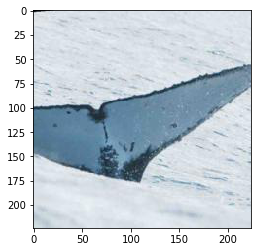

In [53]:
path = 'data/whale/new/train_safe/w_7ed3719/'
for i in os.listdir(path):
    print (path+i)
    display_img(path+i)

In [117]:
# Get multiple batches of training data so as to create new samples
def increase_sample_size(folder_name, size):
    for i in range(0, size):
        print('i', i)
        dataloader, class_names = apply_transformations('data/whale/', folder_name)
        inputs, classes = next(iter(dataloader))
        for j in range(0, len(inputs + 1)):
            print('j', j)
            img_save(inputs[j], folder_name, class_names, title = classes[j])
    

In [128]:
#increase_sample_size(folder_name = 'train_safe', size = 384)
increase_sample_size(folder_name = 'train_safe3', size = 320)#256)

i 0
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378699', 'w_03a2ed7', 'w_03c6d18', 'w_03c84ef', 'w_03fcd5d', 'w_0408054', 'w_045d9fc', 'w_0466071', 'w_0467840', 'w_046a210', 'w_0475042', 'w_048f7a9', 'w_04c1951', 'w_04c841c', 'w_050d056', 'w_05396d8', 'w_05567a9', 'w_056be75', 'w_057c418', 'w_059df09', 'w_059e347', 'w_05b2ddd', 'w_0626e4d', 'w_063d82f', 'w_064ab78', 'w_0654dd9', 'w_06972d2', 'w_06a6351', 'w_06c470d', 'w_06dbe6b', 'w_06ff732', 'w_073b15e', 'w_073f071', 'w_0740d28', 'w_075aa6e', 'w_07616fd', 'w_076c122', 'w_0771d4b', 'w_07e92ee', 'w_07fea3d', 'w_0819271', 'w_081dd6e', 'w_084d01c', 'w_0853262', 'w_0869575', 'w_0899118

j 0
734
j 1
565
j 2
236
j 3
343
j 4
1334
j 5
1142
j 6
331
j 7
1176
j 8
1469
j 9
850
j 10
374
j 11
568
j 12
824
j 13
1586
j 14
982
j 15
1774
j 16
1687
j 17
367
j 18
1787
j 19
1416
j 20
1184
j 21
1076
j 22
7
j 23
1751
j 24
535
j 25
1263
j 26
1775
j 27
1460
j 28
1625
j 29
192
j 30
1091
j 31
1509
j 32
1648
j 33
442
j 34
542
j 35
1246
j 36
1473
j 37
728
j 38
683
j 39
1513
j 40
199
j 41
1541
j 42
266
j 43
636
j 44
297
j 45
348
j 46
271
j 47
711
j 48
1725
j 49
1009
j 50
1520
j 51
1763
j 52
1482
j 53
1190
j 54
709
j 55
596
j 56
828
j 57
1001
j 58
268
j 59
176
j 60
1551
j 61
810
j 62
1677
j 63
1227
i 1
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5'

j 0
1426
j 1
292
j 2
120
j 3
911
j 4
1371
j 5
1484
j 6
1701
j 7
483
j 8
773
j 9
1728
j 10
46
j 11
319
j 12
1071
j 13
918
j 14
1650
j 15
419
j 16
1022
j 17
1320
j 18
1464
j 19
1142
j 20
76
j 21
1170
j 22
551
j 23
851
j 24
300
j 25
1692
j 26
932
j 27
1679
j 28
513
j 29
33
j 30
1610
j 31
54
j 32
1706
j 33
870
j 34
29
j 35
883
j 36
326
j 37
662
j 38
43
j 39
1661
j 40
862
j 41
947
j 42
1125
j 43
3
j 44
519
j 45
1005
j 46
1770
j 47
952
j 48
1341
j 49
1770
j 50
1229
j 51
347
j 52
341
j 53
336
j 54
1033
j 55
1259
j 56
727
j 57
865
j 58
557
j 59
1793
j 60
23
j 61
1779
j 62
73
j 63
697
i 2
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378699',

j 0
1669
j 1
1086
j 2
228
j 3
43
j 4
608
j 5
798
j 6
1537
j 7
349
j 8
623
j 9
1454
j 10
1360
j 11
492
j 12
599
j 13
1258
j 14
113
j 15
1176
j 16
828
j 17
1132
j 18
1367
j 19
333
j 20
949
j 21
1333
j 22
1040
j 23
203
j 24
1491
j 25
1020
j 26
1492
j 27
161
j 28
901
j 29
966
j 30
308
j 31
1696
j 32
1705
j 33
1142
j 34
1189
j 35
797
j 36
19
j 37
675
j 38
1322
j 39
1789
j 40
1806
j 41
77
j 42
868
j 43
368
j 44
1273
j 45
673
j 46
770
j 47
403
j 48
1570
j 49
734
j 50
1311
j 51
1494
j 52
125
j 53
264
j 54
819
j 55
1503
j 56
823
j 57
678
j 58
1625
j 59
486
j 60
528
j 61
955
j 62
1416
j 63
1650
i 3
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_

j 0
101
j 1
75
j 2
173
j 3
554
j 4
1647
j 5
1217
j 6
1381
j 7
1361
j 8
226
j 9
673
j 10
1112
j 11
1353
j 12
982
j 13
1241
j 14
1746
j 15
1448
j 16
934
j 17
279
j 18
441
j 19
1185
j 20
1753
j 21
1061
j 22
192
j 23
100
j 24
63
j 25
1494
j 26
1448
j 27
1168
j 28
394
j 29
1626
j 30
1717
j 31
883
j 32
1548
j 33
707
j 34
922
j 35
441
j 36
1344
j 37
1802
j 38
1664
j 39
1429
j 40
789
j 41
327
j 42
923
j 43
1177
j 44
16
j 45
199
j 46
1519
j 47
1165
j 48
1242
j 49
458
j 50
914
j 51
557
j 52
74
j 53
411
j 54
875
j 55
1726
j 56
1405
j 57
471
j 58
1600
j 59
592
j 60
721
j 61
1729
j 62
190
j 63
730
i 4
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_

j 0
1710
j 1
820
j 2
606
j 3
195
j 4
750
j 5
1095
j 6
493
j 7
1118
j 8
1473
j 9
110
j 10
1408
j 11
769
j 12
233
j 13
1489
j 14
1643
j 15
50
j 16
655
j 17
150
j 18
1244
j 19
557
j 20
76
j 21
1060
j 22
963
j 23
235
j 24
735
j 25
1287
j 26
1538
j 27
1567
j 28
1152
j 29
578
j 30
281
j 31
1537
j 32
500
j 33
1506
j 34
1758
j 35
812
j 36
722
j 37
1735
j 38
1691
j 39
851
j 40
875
j 41
218
j 42
714
j 43
49
j 44
2
j 45
1294
j 46
552
j 47
1006
j 48
786
j 49
959
j 50
1786
j 51
982
j 52
628
j 53
773
j 54
873
j 55
740
j 56
1416
j 57
711
j 58
548
j 59
1048
j 60
525
j 61
1775
j 62
75
j 63
917
i 5
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378699'

j 0
504
j 1
920
j 2
179
j 3
1809
j 4
837
j 5
508
j 6
208
j 7
1751
j 8
343
j 9
981
j 10
1644
j 11
965
j 12
867
j 13
1801
j 14
1182
j 15
1137
j 16
1631
j 17
1745
j 18
207
j 19
177
j 20
1736
j 21
741
j 22
707
j 23
1569
j 24
1743
j 25
391
j 26
813
j 27
64
j 28
672
j 29
1199
j 30
492
j 31
808
j 32
650
j 33
1090
j 34
1772
j 35
980
j 36
545
j 37
960
j 38
1315
j 39
1594
j 40
1637
j 41
1640
j 42
1353
j 43
1269
j 44
1288
j 45
777
j 46
1195
j 47
314
j 48
584
j 49
942
j 50
1747
j 51
521
j 52
648
j 53
1210
j 54
1804
j 55
378
j 56
936
j 57
30
j 58
699
j 59
246
j 60
737
j 61
424
j 62
273
j 63
899
i 6
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
1460
j 1
1399
j 2
940
j 3
738
j 4
399
j 5
1033
j 6
1575
j 7
1033
j 8
45
j 9
1700
j 10
793
j 11
1790
j 12
617
j 13
871
j 14
1281
j 15
1561
j 16
116
j 17
420
j 18
590
j 19
1554
j 20
825
j 21
1400
j 22
34
j 23
229
j 24
1685
j 25
319
j 26
423
j 27
15
j 28
408
j 29
922
j 30
545
j 31
181
j 32
1775
j 33
1713
j 34
512
j 35
1090
j 36
401
j 37
1533
j 38
1428
j 39
571
j 40
1363
j 41
742
j 42
199
j 43
449
j 44
834
j 45
1299
j 46
262
j 47
1285
j 48
229
j 49
1738
j 50
93
j 51
1001
j 52
938
j 53
1747
j 54
1221
j 55
1518
j 56
1293
j 57
1223
j 58
973
j 59
1367
j 60
21
j 61
370
j 62
1767
j 63
1282
i 7
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
727
j 1
799
j 2
1120
j 3
1589
j 4
326
j 5
674
j 6
13
j 7
1215
j 8
893
j 9
1518
j 10
978
j 11
417
j 12
1434
j 13
1759
j 14
1329
j 15
29
j 16
1425
j 17
1700
j 18
1326
j 19
1386
j 20
119
j 21
574
j 22
1706
j 23
1296
j 24
244
j 25
1003
j 26
1647
j 27
1605
j 28
1260
j 29
516
j 30
503
j 31
374
j 32
1236
j 33
1816
j 34
1116
j 35
1734
j 36
874
j 37
1322
j 38
1591
j 39
1191
j 40
1599
j 41
1680
j 42
483
j 43
601
j 44
815
j 45
1473
j 46
844
j 47
895
j 48
399
j 49
103
j 50
807
j 51
72
j 52
337
j 53
1766
j 54
1703
j 55
441
j 56
193
j 57
921
j 58
542
j 59
1651
j 60
215
j 61
273
j 62
1360
j 63
1463
i 8
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
1808
j 1
649
j 2
812
j 3
980
j 4
1462
j 5
274
j 6
1624
j 7
584
j 8
1060
j 9
1465
j 10
350
j 11
329
j 12
819
j 13
135
j 14
170
j 15
230
j 16
799
j 17
619
j 18
1009
j 19
632
j 20
1402
j 21
1554
j 22
600
j 23
385
j 24
1251
j 25
182
j 26
759
j 27
775
j 28
1498
j 29
844
j 30
712
j 31
1743
j 32
1010
j 33
972
j 34
130
j 35
1755
j 36
1292
j 37
1049
j 38
246
j 39
1201
j 40
665
j 41
433
j 42
882
j 43
1089
j 44
1554
j 45
1624
j 46
1748
j 47
1061
j 48
134
j 49
1194
j 50
1285
j 51
145
j 52
36
j 53
817
j 54
921
j 55
1317
j 56
1341
j 57
1232
j 58
525
j 59
727
j 60
498
j 61
1292
j 62
1292
j 63
871
i 9
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w

j 0
584
j 1
604
j 2
1217
j 3
1133
j 4
377
j 5
104
j 6
762
j 7
612
j 8
524
j 9
1269
j 10
1314
j 11
350
j 12
1664
j 13
1174
j 14
1149
j 15
591
j 16
724
j 17
1329
j 18
375
j 19
791
j 20
123
j 21
130
j 22
1303
j 23
1479
j 24
831
j 25
1141
j 26
953
j 27
1134
j 28
921
j 29
593
j 30
1414
j 31
1140
j 32
1378
j 33
1270
j 34
800
j 35
758
j 36
936
j 37
1593
j 38
751
j 39
1196
j 40
1131
j 41
1805
j 42
699
j 43
821
j 44
1338
j 45
1213
j 46
840
j 47
1060
j 48
584
j 49
1702
j 50
298
j 51
597
j 52
408
j 53
1053
j 54
1591
j 55
890
j 56
1663
j 57
423
j 58
422
j 59
263
j 60
376
j 61
719
j 62
1066
j 63
1789
i 10
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5',

j 0
1307
j 1
205
j 2
1747
j 3
1134
j 4
751
j 5
535
j 6
216
j 7
552
j 8
234
j 9
1423
j 10
278
j 11
1110
j 12
1782
j 13
522
j 14
1333
j 15
829
j 16
639
j 17
695
j 18
1598
j 19
937
j 20
608
j 21
803
j 22
1683
j 23
1225
j 24
1565
j 25
1105
j 26
1350
j 27
706
j 28
1184
j 29
375
j 30
497
j 31
440
j 32
1542
j 33
656
j 34
473
j 35
1139
j 36
1748
j 37
1379
j 38
503
j 39
423
j 40
1547
j 41
1657
j 42
502
j 43
1811
j 44
959
j 45
1118
j 46
946
j 47
1259
j 48
1214
j 49
1335
j 50
858
j 51
648
j 52
1600
j 53
1799
j 54
1209
j 55
1715
j 56
719
j 57
701
j 58
338
j 59
161
j 60
1252
j 61
1813
j 62
284
j 63
692
i 11
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5

j 0
583
j 1
483
j 2
1710
j 3
593
j 4
1252
j 5
1786
j 6
1376
j 7
1141
j 8
116
j 9
1787
j 10
504
j 11
1636
j 12
272
j 13
375
j 14
698
j 15
449
j 16
652
j 17
606
j 18
793
j 19
944
j 20
786
j 21
1819
j 22
1355
j 23
353
j 24
1718
j 25
274
j 26
1377
j 27
987
j 28
583
j 29
1642
j 30
913
j 31
135
j 32
1392
j 33
1573
j 34
596
j 35
561
j 36
1741
j 37
496
j 38
390
j 39
1187
j 40
1399
j 41
1062
j 42
1484
j 43
130
j 44
1178
j 45
1704
j 46
1652
j 47
840
j 48
1629
j 49
52
j 50
406
j 51
176
j 52
1427
j 53
1349
j 54
597
j 55
870
j 56
1652
j 57
570
j 58
88
j 59
1440
j 60
844
j 61
1151
j 62
1811
j 63
1421
i 12
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
1350
j 1
629
j 2
1144
j 3
262
j 4
1363
j 5
1032
j 6
1102
j 7
979
j 8
727
j 9
882
j 10
1676
j 11
1660
j 12
77
j 13
714
j 14
1428
j 15
549
j 16
95
j 17
535
j 18
269
j 19
626
j 20
1341
j 21
959
j 22
1238
j 23
403
j 24
11
j 25
789
j 26
357
j 27
1610
j 28
978
j 29
340
j 30
45
j 31
675
j 32
61
j 33
317
j 34
96
j 35
1335
j 36
563
j 37
1493
j 38
555
j 39
680
j 40
667
j 41
970
j 42
1678
j 43
417
j 44
792
j 45
431
j 46
553
j 47
174
j 48
1581
j 49
1675
j 50
293
j 51
110
j 52
425
j 53
1288
j 54
1328
j 55
243
j 56
1615
j 57
195
j 58
888
j 59
755
j 60
66
j 61
1166
j 62
1285
j 63
723
i 13
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378699', '

j 0
108
j 1
769
j 2
1671
j 3
1415
j 4
767
j 5
1778
j 6
1737
j 7
1752
j 8
1594
j 9
48
j 10
1199
j 11
957
j 12
1364
j 13
728
j 14
599
j 15
1389
j 16
902
j 17
1706
j 18
1407
j 19
459
j 20
643
j 21
425
j 22
96
j 23
324
j 24
1124
j 25
1736
j 26
772
j 27
803
j 28
309
j 29
1589
j 30
158
j 31
54
j 32
655
j 33
1618
j 34
1593
j 35
1073
j 36
1681
j 37
727
j 38
118
j 39
1467
j 40
236
j 41
8
j 42
1278
j 43
236
j 44
581
j 45
120
j 46
864
j 47
1323
j 48
285
j 49
229
j 50
920
j 51
975
j 52
741
j 53
441
j 54
570
j 55
1386
j 56
1546
j 57
24
j 58
1567
j 59
1629
j 60
1571
j 61
1353
j 62
1015
j 63
633
i 14
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
1433
j 1
761
j 2
609
j 3
61
j 4
23
j 5
1098
j 6
1406
j 7
53
j 8
1042
j 9
608
j 10
1306
j 11
1529
j 12
832
j 13
33
j 14
1124
j 15
1096
j 16
1697
j 17
740
j 18
1247
j 19
1281
j 20
1751
j 21
165
j 22
55
j 23
866
j 24
1567
j 25
419
j 26
418
j 27
1015
j 28
150
j 29
189
j 30
1384
j 31
535
j 32
88
j 33
1319
j 34
805
j 35
168
j 36
294
j 37
1021
j 38
1777
j 39
188
j 40
681
j 41
343
j 42
702
j 43
1236
j 44
654
j 45
271
j 46
160
j 47
964
j 48
1762
j 49
303
j 50
311
j 51
647
j 52
1651
j 53
1764
j 54
277
j 55
1599
j 56
1712
j 57
1402
j 58
1506
j 59
1284
j 60
443
j 61
1457
j 62
988
j 63
1427
i 15
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
369
j 1
295
j 2
1496
j 3
218
j 4
1645
j 5
194
j 6
467
j 7
766
j 8
1672
j 9
1446
j 10
1376
j 11
1149
j 12
656
j 13
68
j 14
1750
j 15
508
j 16
429
j 17
1467
j 18
1359
j 19
1303
j 20
1185
j 21
1361
j 22
165
j 23
897
j 24
721
j 25
1809
j 26
1220
j 27
40
j 28
920
j 29
765
j 30
567
j 31
1437
j 32
927
j 33
464
j 34
1744
j 35
46
j 36
1344
j 37
1461
j 38
968
j 39
1634
j 40
225
j 41
1010
j 42
253
j 43
583
j 44
1710
j 45
1598
j 46
523
j 47
301
j 48
481
j 49
1148
j 50
75
j 51
1391
j 52
495
j 53
1513
j 54
112
j 55
1560
j 56
1797
j 57
1805
j 58
1554
j 59
1171
j 60
387
j 61
1235
j 62
1803
j 63
961
i 16
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
1520
j 1
1118
j 2
198
j 3
1575
j 4
997
j 5
922
j 6
1353
j 7
1157
j 8
1177
j 9
263
j 10
154
j 11
489
j 12
245
j 13
365
j 14
746
j 15
1516
j 16
1439
j 17
454
j 18
160
j 19
1670
j 20
338
j 21
893
j 22
671
j 23
297
j 24
1260
j 25
1193
j 26
305
j 27
1174
j 28
1413
j 29
806
j 30
546
j 31
612
j 32
261
j 33
736
j 34
807
j 35
799
j 36
717
j 37
1130
j 38
454
j 39
205
j 40
656
j 41
935
j 42
1548
j 43
989
j 44
631
j 45
1806
j 46
1215
j 47
1121
j 48
288
j 49
452
j 50
1164
j 51
1234
j 52
1768
j 53
1783
j 54
1189
j 55
539
j 56
808
j 57
271
j 58
1221
j 59
408
j 60
1043
j 61
1396
j 62
1137
j 63
121
i 17
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', '

j 0
824
j 1
1400
j 2
960
j 3
1497
j 4
838
j 5
431
j 6
1382
j 7
1654
j 8
530
j 9
943
j 10
1321
j 11
426
j 12
1556
j 13
1476
j 14
980
j 15
1391
j 16
1204
j 17
245
j 18
1805
j 19
1145
j 20
135
j 21
550
j 22
714
j 23
1033
j 24
1454
j 25
1564
j 26
1741
j 27
304
j 28
1532
j 29
1506
j 30
733
j 31
62
j 32
1736
j 33
866
j 34
1338
j 35
223
j 36
150
j 37
1502
j 38
1033
j 39
88
j 40
1437
j 41
1560
j 42
1581
j 43
36
j 44
1194
j 45
856
j 46
1583
j 47
293
j 48
1235
j 49
241
j 50
1241
j 51
559
j 52
1095
j 53
1119
j 54
1102
j 55
1349
j 56
1677
j 57
1064
j 58
1206
j 59
922
j 60
596
j 61
119
j 62
800
j 63
1786
i 18
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337a

j 0
1196
j 1
807
j 2
1386
j 3
214
j 4
701
j 5
1054
j 6
1022
j 7
1656
j 8
277
j 9
1060
j 10
598
j 11
794
j 12
791
j 13
1654
j 14
667
j 15
1366
j 16
1242
j 17
1306
j 18
1298
j 19
29
j 20
1076
j 21
343
j 22
624
j 23
552
j 24
462
j 25
643
j 26
1693
j 27
1790
j 28
568
j 29
1637
j 30
1695
j 31
733
j 32
1509
j 33
1125
j 34
1236
j 35
937
j 36
1172
j 37
43
j 38
429
j 39
1157
j 40
1549
j 41
1149
j 42
1429
j 43
563
j 44
1799
j 45
1550
j 46
1659
j 47
904
j 48
604
j 49
1463
j 50
27
j 51
1048
j 52
78
j 53
708
j 54
501
j 55
1594
j 56
1228
j 57
1536
j 58
770
j 59
859
j 60
1661
j 61
954
j 62
949
j 63
540
i 19
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5',

j 0
581
j 1
1274
j 2
404
j 3
1095
j 4
1520
j 5
1234
j 6
1018
j 7
27
j 8
464
j 9
383
j 10
476
j 11
265
j 12
961
j 13
490
j 14
149
j 15
1102
j 16
333
j 17
1273
j 18
287
j 19
1578
j 20
296
j 21
1099
j 22
1409
j 23
1599
j 24
564
j 25
264
j 26
144
j 27
1713
j 28
370
j 29
401
j 30
531
j 31
716
j 32
1020
j 33
1577
j 34
1298
j 35
1001
j 36
595
j 37
552
j 38
1107
j 39
952
j 40
1081
j 41
907
j 42
589
j 43
523
j 44
1693
j 45
221
j 46
850
j 47
427
j 48
384
j 49
1207
j 50
272
j 51
1570
j 52
1366
j 53
1382
j 54
1544
j 55
1529
j 56
761
j 57
983
j 58
1458
j 59
1589
j 60
1209
j 61
1704
j 62
1032
j 63
1228
i 20
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5'

j 0
1250
j 1
1300
j 2
1012
j 3
1270
j 4
1624
j 5
1086
j 6
1522
j 7
1405
j 8
285
j 9
380
j 10
802
j 11
644
j 12
1352
j 13
717
j 14
1735
j 15
289
j 16
623
j 17
1365
j 18
384
j 19
607
j 20
139
j 21
684
j 22
1170
j 23
6
j 24
407
j 25
350
j 26
1309
j 27
1706
j 28
149
j 29
1397
j 30
930
j 31
350
j 32
157
j 33
924
j 34
96
j 35
488
j 36
746
j 37
989
j 38
668
j 39
1037
j 40
1283
j 41
1101
j 42
226
j 43
279
j 44
834
j 45
1454
j 46
987
j 47
1359
j 48
1131
j 49
1401
j 50
1571
j 51
271
j 52
876
j 53
573
j 54
1022
j 55
229
j 56
1651
j 57
1146
j 58
743
j 59
1589
j 60
1641
j 61
757
j 62
1521
j 63
710
i 21
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w

j 0
977
j 1
412
j 2
597
j 3
1057
j 4
1267
j 5
19
j 6
1458
j 7
55
j 8
1237
j 9
530
j 10
906
j 11
1572
j 12
628
j 13
1558
j 14
25
j 15
1047
j 16
1567
j 17
654
j 18
737
j 19
938
j 20
59
j 21
1811
j 22
1426
j 23
172
j 24
1095
j 25
234
j 26
1351
j 27
1128
j 28
843
j 29
1587
j 30
286
j 31
1319
j 32
1093
j 33
917
j 34
1372
j 35
1064
j 36
550
j 37
1233
j 38
380
j 39
158
j 40
554
j 41
918
j 42
871
j 43
232
j 44
1444
j 45
1431
j 46
1496
j 47
703
j 48
969
j 49
908
j 50
948
j 51
1560
j 52
196
j 53
1184
j 54
359
j 55
649
j 56
923
j 57
1000
j 58
989
j 59
1511
j 60
753
j 61
508
j 62
1489
j 63
622
i 22
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
1572
j 1
247
j 2
997
j 3
530
j 4
1106
j 5
1072
j 6
829
j 7
111
j 8
901
j 9
188
j 10
1241
j 11
69
j 12
367
j 13
194
j 14
553
j 15
1749
j 16
1033
j 17
1053
j 18
515
j 19
509
j 20
1122
j 21
324
j 22
519
j 23
689
j 24
53
j 25
788
j 26
1093
j 27
1324
j 28
481
j 29
263
j 30
308
j 31
1125
j 32
1734
j 33
1040
j 34
1100
j 35
1512
j 36
1417
j 37
1063
j 38
12
j 39
1475
j 40
1731
j 41
1026
j 42
1654
j 43
656
j 44
1005
j 45
575
j 46
69
j 47
1530
j 48
1407
j 49
821
j 50
1583
j 51
1426
j 52
810
j 53
733
j 54
506
j 55
1774
j 56
1046
j 57
285
j 58
1698
j 59
1175
j 60
881
j 61
1564
j 62
1350
j 63
511
i 23
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
581
j 1
70
j 2
1694
j 3
526
j 4
1704
j 5
304
j 6
946
j 7
30
j 8
663
j 9
1745
j 10
1271
j 11
1574
j 12
1147
j 13
718
j 14
1784
j 15
952
j 16
560
j 17
1589
j 18
222
j 19
1107
j 20
871
j 21
1637
j 22
553
j 23
1096
j 24
273
j 25
1704
j 26
155
j 27
1034
j 28
1578
j 29
512
j 30
625
j 31
1036
j 32
372
j 33
30
j 34
866
j 35
1361
j 36
1504
j 37
1680
j 38
1126
j 39
1053
j 40
1650
j 41
693
j 42
450
j 43
145
j 44
586
j 45
1489
j 46
761
j 47
1655
j 48
1309
j 49
880
j 50
70
j 51
1724
j 52
1701
j 53
1315
j 54
110
j 55
1673
j 56
837
j 57
1581
j 58
145
j 59
255
j 60
1472
j 61
1360
j 62
660
j 63
1089
i 24
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
74
j 1
450
j 2
873
j 3
1215
j 4
1305
j 5
1295
j 6
55
j 7
1086
j 8
138
j 9
17
j 10
1778
j 11
114
j 12
57
j 13
554
j 14
209
j 15
72
j 16
1462
j 17
1292
j 18
923
j 19
1740
j 20
947
j 21
1383
j 22
1410
j 23
1668
j 24
929
j 25
816
j 26
195
j 27
1409
j 28
1009
j 29
439
j 30
758
j 31
592
j 32
514
j 33
400
j 34
1359
j 35
22
j 36
936
j 37
668
j 38
991
j 39
1202
j 40
1624
j 41
199
j 42
1667
j 43
1176
j 44
135
j 45
1281
j 46
627
j 47
63
j 48
1633
j 49
716
j 50
1160
j 51
602
j 52
1355
j 53
1048
j 54
1468
j 55
1546
j 56
301
j 57
596
j 58
36
j 59
406
j 60
1250
j 61
1223
j 62
206
j 63
1691
i 25
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03786

j 0
1643
j 1
1142
j 2
1354
j 3
901
j 4
1399
j 5
1509
j 6
949
j 7
719
j 8
739
j 9
999
j 10
820
j 11
1500
j 12
1599
j 13
374
j 14
688
j 15
1409
j 16
680
j 17
1170
j 18
527
j 19
1172
j 20
837
j 21
1347
j 22
286
j 23
891
j 24
1536
j 25
742
j 26
1707
j 27
1434
j 28
1534
j 29
1030
j 30
940
j 31
1276
j 32
245
j 33
1170
j 34
1088
j 35
1426
j 36
717
j 37
370
j 38
1752
j 39
1808
j 40
333
j 41
1480
j 42
1100
j 43
1104
j 44
174
j 45
1133
j 46
1528
j 47
916
j 48
760
j 49
903
j 50
751
j 51
1387
j 52
753
j 53
854
j 54
396
j 55
1512
j 56
1509
j 57
1279
j 58
324
j 59
1551
j 60
328
j 61
1578
j 62
66
j 63
1578
i 26
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337a

j 0
1057
j 1
866
j 2
12
j 3
1580
j 4
819
j 5
33
j 6
1329
j 7
1067
j 8
1691
j 9
1725
j 10
516
j 11
597
j 12
729
j 13
1775
j 14
1164
j 15
229
j 16
369
j 17
328
j 18
1566
j 19
170
j 20
636
j 21
1402
j 22
643
j 23
1591
j 24
465
j 25
187
j 26
1800
j 27
1034
j 28
797
j 29
726
j 30
1695
j 31
189
j 32
178
j 33
919
j 34
592
j 35
612
j 36
609
j 37
148
j 38
601
j 39
1573
j 40
487
j 41
341
j 42
1210
j 43
663
j 44
786
j 45
560
j 46
1714
j 47
485
j 48
1327
j 49
896
j 50
670
j 51
947
j 52
1625
j 53
1773
j 54
855
j 55
1426
j 56
1524
j 57
1266
j 58
212
j 59
1445
j 60
539
j 61
563
j 62
1600
j 63
1162
i 27
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
319
j 1
1508
j 2
142
j 3
1269
j 4
1100
j 5
122
j 6
1378
j 7
986
j 8
367
j 9
144
j 10
1060
j 11
272
j 12
1628
j 13
441
j 14
792
j 15
131
j 16
1040
j 17
1591
j 18
541
j 19
1294
j 20
265
j 21
633
j 22
1123
j 23
319
j 24
182
j 25
1794
j 26
1554
j 27
817
j 28
999
j 29
293
j 30
784
j 31
1247
j 32
342
j 33
59
j 34
1565
j 35
91
j 36
938
j 37
1459
j 38
111
j 39
856
j 40
1302
j 41
1372
j 42
1375
j 43
690
j 44
944
j 45
1421
j 46
1002
j 47
1710
j 48
680
j 49
687
j 50
600
j 51
1388
j 52
1326
j 53
1509
j 54
802
j 55
1726
j 56
1010
j 57
1409
j 58
956
j 59
384
j 60
1478
j 61
1301
j 62
838
j 63
1488
i 28
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
945
j 1
994
j 2
718
j 3
665
j 4
139
j 5
1326
j 6
264
j 7
802
j 8
103
j 9
634
j 10
1206
j 11
1749
j 12
1752
j 13
692
j 14
1303
j 15
149
j 16
867
j 17
328
j 18
413
j 19
1130
j 20
506
j 21
1123
j 22
1155
j 23
1434
j 24
670
j 25
305
j 26
250
j 27
861
j 28
1802
j 29
1017
j 30
1554
j 31
411
j 32
336
j 33
141
j 34
198
j 35
1649
j 36
1365
j 37
1279
j 38
1094
j 39
1665
j 40
1517
j 41
1699
j 42
1636
j 43
321
j 44
1492
j 45
960
j 46
2
j 47
711
j 48
211
j 49
1617
j 50
722
j 51
1116
j 52
616
j 53
392
j 54
1308
j 55
1509
j 56
705
j 57
57
j 58
843
j 59
1452
j 60
330
j 61
96
j 62
511
j 63
187
i 29
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
307
j 1
1500
j 2
938
j 3
236
j 4
229
j 5
1467
j 6
1540
j 7
525
j 8
1128
j 9
154
j 10
1248
j 11
1404
j 12
136
j 13
692
j 14
387
j 15
895
j 16
231
j 17
559
j 18
1740
j 19
94
j 20
698
j 21
1594
j 22
1691
j 23
683
j 24
1721
j 25
1630
j 26
1678
j 27
159
j 28
327
j 29
1560
j 30
1766
j 31
1629
j 32
978
j 33
793
j 34
317
j 35
1379
j 36
1802
j 37
1359
j 38
1180
j 39
997
j 40
438
j 41
139
j 42
446
j 43
703
j 44
1356
j 45
1660
j 46
1172
j 47
1146
j 48
852
j 49
1252
j 50
898
j 51
400
j 52
1085
j 53
137
j 54
116
j 55
195
j 56
1704
j 57
94
j 58
1086
j 59
394
j 60
1337
j 61
679
j 62
77
j 63
515
i 30
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_

j 0
791
j 1
1743
j 2
1580
j 3
743
j 4
1308
j 5
375
j 6
685
j 7
1350
j 8
165
j 9
1048
j 10
1803
j 11
203
j 12
723
j 13
746
j 14
1552
j 15
805
j 16
1514
j 17
1816
j 18
214
j 19
649
j 20
403
j 21
1743
j 22
1060
j 23
1178
j 24
1089
j 25
1215
j 26
241
j 27
912
j 28
969
j 29
1000
j 30
1446
j 31
702
j 32
1571
j 33
245
j 34
613
j 35
553
j 36
1806
j 37
1730
j 38
1481
j 39
721
j 40
341
j 41
1616
j 42
490
j 43
1289
j 44
1052
j 45
785
j 46
1216
j 47
1380
j 48
472
j 49
539
j 50
298
j 51
568
j 52
1199
j 53
992
j 54
819
j 55
217
j 56
1091
j 57
1564
j 58
1334
j 59
479
j 60
1189
j 61
1678
j 62
1599
j 63
1588
i 31
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337a

j 0
899
j 1
1306
j 2
1394
j 3
408
j 4
422
j 5
4
j 6
1300
j 7
737
j 8
1516
j 9
83
j 10
347
j 11
1389
j 12
517
j 13
981
j 14
1640
j 15
453
j 16
866
j 17
1150
j 18
1560
j 19
195
j 20
882
j 21
949
j 22
1040
j 23
1059
j 24
1502
j 25
57
j 26
284
j 27
742
j 28
1747
j 29
404
j 30
1509
j 31
133
j 32
243
j 33
1340
j 34
1624
j 35
1662
j 36
1784
j 37
1633
j 38
1142
j 39
431
j 40
1616
j 41
1275
j 42
625
j 43
1031
j 44
1400
j 45
470
j 46
1307
j 47
804
j 48
965
j 49
927
j 50
838
j 51
1130
j 52
1392
j 53
1691
j 54
444
j 55
1571
j 56
1664
j 57
717
j 58
1464
j 59
1040
j 60
220
j 61
544
j 62
1664
j 63
1677
i 32
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5',

j 0
282
j 1
786
j 2
749
j 3
1367
j 4
759
j 5
78
j 6
99
j 7
46
j 8
777
j 9
1220
j 10
1443
j 11
142
j 12
1787
j 13
1813
j 14
614
j 15
1046
j 16
1663
j 17
1680
j 18
1329
j 19
285
j 20
218
j 21
1335
j 22
1055
j 23
374
j 24
1380
j 25
866
j 26
854
j 27
22
j 28
392
j 29
194
j 30
144
j 31
946
j 32
652
j 33
1775
j 34
874
j 35
1213
j 36
257
j 37
1395
j 38
1402
j 39
410
j 40
427
j 41
1772
j 42
470
j 43
100
j 44
675
j 45
499
j 46
323
j 47
1063
j 48
670
j 49
1446
j 50
886
j 51
1564
j 52
319
j 53
216
j 54
474
j 55
434
j 56
1719
j 57
1497
j 58
617
j 59
1597
j 60
1615
j 61
849
j 62
1814
j 63
989
i 33
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378

j 0
1453
j 1
1101
j 2
1674
j 3
369
j 4
1398
j 5
460
j 6
1657
j 7
45
j 8
1470
j 9
88
j 10
1706
j 11
819
j 12
1245
j 13
570
j 14
116
j 15
1722
j 16
1624
j 17
158
j 18
232
j 19
1154
j 20
219
j 21
1338
j 22
1625
j 23
546
j 24
627
j 25
821
j 26
813
j 27
1735
j 28
557
j 29
628
j 30
1024
j 31
1160
j 32
1595
j 33
1663
j 34
125
j 35
1076
j 36
968
j 37
52
j 38
1770
j 39
1484
j 40
89
j 41
698
j 42
1269
j 43
1528
j 44
298
j 45
1561
j 46
1250
j 47
1668
j 48
1015
j 49
1461
j 50
1371
j 51
172
j 52
86
j 53
1001
j 54
1186
j 55
1142
j 56
1388
j 57
922
j 58
1688
j 59
1520
j 60
386
j 61
1378
j 62
80
j 63
1495
i 34
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5

j 0
1622
j 1
882
j 2
34
j 3
805
j 4
1704
j 5
23
j 6
887
j 7
1214
j 8
663
j 9
20
j 10
763
j 11
1470
j 12
805
j 13
1585
j 14
1102
j 15
1730
j 16
535
j 17
1134
j 18
636
j 19
960
j 20
794
j 21
1256
j 22
605
j 23
357
j 24
94
j 25
5
j 26
426
j 27
1697
j 28
3
j 29
1366
j 30
619
j 31
241
j 32
1784
j 33
400
j 34
94
j 35
714
j 36
1773
j 37
948
j 38
1040
j 39
367
j 40
141
j 41
1278
j 42
1190
j 43
597
j 44
209
j 45
1431
j 46
1059
j 47
1567
j 48
681
j 49
1629
j 50
1171
j 51
755
j 52
1494
j 53
277
j 54
206
j 55
377
j 56
669
j 57
745
j 58
1452
j 59
1564
j 60
141
j 61
832
j 62
1589
j 63
984
i 35
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378699',

j 0
870
j 1
1253
j 2
556
j 3
1470
j 4
988
j 5
1430
j 6
1668
j 7
893
j 8
625
j 9
428
j 10
89
j 11
1045
j 12
854
j 13
1774
j 14
792
j 15
1167
j 16
1193
j 17
1264
j 18
1676
j 19
874
j 20
39
j 21
1451
j 22
481
j 23
810
j 24
11
j 25
116
j 26
415
j 27
703
j 28
1508
j 29
992
j 30
661
j 31
364
j 32
1345
j 33
445
j 34
680
j 35
1273
j 36
1095
j 37
1286
j 38
1802
j 39
416
j 40
726
j 41
1688
j 42
853
j 43
141
j 44
1082
j 45
1433
j 46
1120
j 47
1278
j 48
1753
j 49
1685
j 50
926
j 51
860
j 52
1221
j 53
1027
j 54
604
j 55
1059
j 56
39
j 57
1422
j 58
1819
j 59
1450
j 60
461
j 61
45
j 62
1495
j 63
1358
i 36
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', '

j 0
1411
j 1
300
j 2
1546
j 3
1160
j 4
60
j 5
242
j 6
1628
j 7
406
j 8
1074
j 9
727
j 10
246
j 11
729
j 12
588
j 13
853
j 14
301
j 15
1721
j 16
228
j 17
504
j 18
727
j 19
382
j 20
1815
j 21
1378
j 22
1179
j 23
1112
j 24
764
j 25
970
j 26
276
j 27
1148
j 28
1225
j 29
535
j 30
20
j 31
1226
j 32
977
j 33
1021
j 34
103
j 35
502
j 36
1207
j 37
1196
j 38
1040
j 39
86
j 40
1163
j 41
1727
j 42
415
j 43
1325
j 44
847
j 45
765
j 46
573
j 47
669
j 48
959
j 49
1303
j 50
1412
j 51
1356
j 52
1045
j 53
383
j 54
1109
j 55
314
j 56
1783
j 57
1061
j 58
1554
j 59
681
j 60
1317
j 61
1770
j 62
367
j 63
621
i 37
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', '

j 0
485
j 1
725
j 2
1351
j 3
853
j 4
1581
j 5
1798
j 6
780
j 7
1154
j 8
1272
j 9
466
j 10
367
j 11
33
j 12
1704
j 13
1330
j 14
586
j 15
1281
j 16
1060
j 17
358
j 18
1387
j 19
243
j 20
1287
j 21
1797
j 22
1703
j 23
514
j 24
55
j 25
133
j 26
960
j 27
1766
j 28
294
j 29
68
j 30
1321
j 31
1164
j 32
1661
j 33
379
j 34
1326
j 35
882
j 36
1075
j 37
350
j 38
1448
j 39
237
j 40
599
j 41
671
j 42
266
j 43
967
j 44
1768
j 45
1485
j 46
463
j 47
1194
j 48
464
j 49
193
j 50
83
j 51
241
j 52
543
j 53
1527
j 54
695
j 55
703
j 56
1709
j 57
119
j 58
116
j 59
914
j 60
739
j 61
1511
j 62
370
j 63
1598
i 38
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
1633
j 1
1361
j 2
1728
j 3
266
j 4
20
j 5
866
j 6
31
j 7
1290
j 8
636
j 9
126
j 10
990
j 11
1753
j 12
1090
j 13
1779
j 14
65
j 15
370
j 16
1661
j 17
889
j 18
65
j 19
946
j 20
157
j 21
259
j 22
473
j 23
1046
j 24
644
j 25
51
j 26
972
j 27
666
j 28
1259
j 29
526
j 30
460
j 31
1501
j 32
893
j 33
1444
j 34
1335
j 35
541
j 36
1503
j 37
1673
j 38
1622
j 39
1527
j 40
1051
j 41
1786
j 42
949
j 43
747
j 44
224
j 45
1404
j 46
821
j 47
242
j 48
1203
j 49
117
j 50
1303
j 51
485
j 52
786
j 53
1736
j 54
1291
j 55
589
j 56
631
j 57
370
j 58
453
j 59
834
j 60
1527
j 61
1599
j 62
1714
j 63
797
i 39
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
1769
j 1
1696
j 2
856
j 3
644
j 4
68
j 5
1635
j 6
929
j 7
1698
j 8
1100
j 9
163
j 10
1392
j 11
742
j 12
320
j 13
1704
j 14
183
j 15
1506
j 16
1462
j 17
133
j 18
165
j 19
1225
j 20
375
j 21
424
j 22
1452
j 23
475
j 24
1174
j 25
840
j 26
1485
j 27
823
j 28
108
j 29
241
j 30
1173
j 31
1310
j 32
1170
j 33
123
j 34
241
j 35
179
j 36
1572
j 37
960
j 38
1321
j 39
1149
j 40
1740
j 41
965
j 42
1147
j 43
1005
j 44
1527
j 45
1638
j 46
530
j 47
38
j 48
322
j 49
903
j 50
1226
j 51
31
j 52
1249
j 53
1001
j 54
395
j 55
1490
j 56
1540
j 57
0
j 58
1520
j 59
670
j 60
264
j 61
769
j 62
26
j 63
81
i 40
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
716
j 1
766
j 2
97
j 3
1080
j 4
952
j 5
709
j 6
965
j 7
613
j 8
1409
j 9
216
j 10
1155
j 11
1285
j 12
811
j 13
1176
j 14
245
j 15
163
j 16
702
j 17
434
j 18
822
j 19
1667
j 20
1664
j 21
867
j 22
644
j 23
246
j 24
1642
j 25
808
j 26
1469
j 27
1594
j 28
1523
j 29
1588
j 30
215
j 31
1629
j 32
46
j 33
487
j 34
161
j 35
1099
j 36
618
j 37
1270
j 38
418
j 39
687
j 40
765
j 41
951
j 42
193
j 43
684
j 44
891
j 45
1609
j 46
148
j 47
1118
j 48
683
j 49
1034
j 50
1768
j 51
1005
j 52
194
j 53
947
j 54
1346
j 55
1135
j 56
800
j 57
430
j 58
1383
j 59
234
j 60
1109
j 61
1469
j 62
1125
j 63
496
i 41
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
212
j 1
74
j 2
275
j 3
632
j 4
199
j 5
1034
j 6
370
j 7
650
j 8
1491
j 9
94
j 10
407
j 11
1562
j 12
906
j 13
1416
j 14
1559
j 15
260
j 16
1240
j 17
1303
j 18
887
j 19
1544
j 20
1053
j 21
1094
j 22
483
j 23
1231
j 24
432
j 25
1521
j 26
1375
j 27
877
j 28
209
j 29
98
j 30
1595
j 31
1300
j 32
1506
j 33
1361
j 34
959
j 35
1647
j 36
1753
j 37
230
j 38
611
j 39
711
j 40
235
j 41
329
j 42
961
j 43
277
j 44
496
j 45
1361
j 46
1067
j 47
1309
j 48
1664
j 49
1541
j 50
868
j 51
1261
j 52
1391
j 53
501
j 54
1149
j 55
1044
j 56
810
j 57
1634
j 58
246
j 59
1099
j 60
1018
j 61
849
j 62
356
j 63
1410
i 42
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5',

j 0
1012
j 1
124
j 2
783
j 3
762
j 4
275
j 5
990
j 6
424
j 7
539
j 8
749
j 9
953
j 10
12
j 11
548
j 12
862
j 13
1255
j 14
1540
j 15
1753
j 16
11
j 17
1005
j 18
150
j 19
1569
j 20
562
j 21
495
j 22
1434
j 23
625
j 24
1222
j 25
1165
j 26
188
j 27
89
j 28
1250
j 29
938
j 30
261
j 31
535
j 32
1700
j 33
1694
j 34
967
j 35
779
j 36
1233
j 37
1027
j 38
774
j 39
84
j 40
153
j 41
1268
j 42
310
j 43
699
j 44
961
j 45
1789
j 46
273
j 47
1144
j 48
238
j 49
388
j 50
1239
j 51
329
j 52
994
j 53
979
j 54
738
j 55
99
j 56
1525
j 57
1319
j 58
1469
j 59
1432
j 60
706
j 61
1468
j 62
174
j 63
1003
i 43
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037869

j 0
838
j 1
242
j 2
1019
j 3
1409
j 4
1494
j 5
878
j 6
503
j 7
81
j 8
756
j 9
94
j 10
108
j 11
20
j 12
1150
j 13
1165
j 14
1777
j 15
1277
j 16
1811
j 17
489
j 18
1305
j 19
1474
j 20
120
j 21
1351
j 22
1060
j 23
980
j 24
828
j 25
1352
j 26
1566
j 27
1459
j 28
1370
j 29
296
j 30
539
j 31
502
j 32
1191
j 33
759
j 34
1566
j 35
542
j 36
458
j 37
454
j 38
1040
j 39
1470
j 40
797
j 41
532
j 42
986
j 43
1167
j 44
1413
j 45
466
j 46
312
j 47
429
j 48
1040
j 49
1814
j 50
896
j 51
450
j 52
1353
j 53
288
j 54
706
j 55
1764
j 56
993
j 57
1686
j 58
148
j 59
1668
j 60
532
j 61
10
j 62
58
j 63
1134
i 44
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
248
j 1
1173
j 2
939
j 3
825
j 4
778
j 5
128
j 6
1401
j 7
266
j 8
1710
j 9
990
j 10
1262
j 11
185
j 12
188
j 13
807
j 14
1185
j 15
1099
j 16
175
j 17
1250
j 18
1694
j 19
1805
j 20
1366
j 21
1557
j 22
1696
j 23
215
j 24
1387
j 25
1209
j 26
214
j 27
1673
j 28
130
j 29
602
j 30
849
j 31
979
j 32
168
j 33
809
j 34
387
j 35
1593
j 36
126
j 37
196
j 38
1146
j 39
1683
j 40
1530
j 41
679
j 42
1444
j 43
1242
j 44
1370
j 45
1003
j 46
1347
j 47
747
j 48
954
j 49
1526
j 50
1171
j 51
864
j 52
1379
j 53
1491
j 54
1569
j 55
1234
j 56
1120
j 57
487
j 58
559
j 59
1439
j 60
1285
j 61
1747
j 62
819
j 63
88
i 45
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337a

j 0
1761
j 1
1202
j 2
1028
j 3
272
j 4
892
j 5
1302
j 6
65
j 7
776
j 8
1277
j 9
1401
j 10
1221
j 11
357
j 12
1637
j 13
1452
j 14
1648
j 15
584
j 16
1239
j 17
742
j 18
1758
j 19
173
j 20
1612
j 21
101
j 22
1707
j 23
555
j 24
1598
j 25
786
j 26
1422
j 27
1476
j 28
1267
j 29
1307
j 30
150
j 31
245
j 32
8
j 33
1597
j 34
1811
j 35
237
j 36
170
j 37
1683
j 38
1241
j 39
1188
j 40
1057
j 41
23
j 42
1447
j 43
1385
j 44
1505
j 45
1785
j 46
1043
j 47
1707
j 48
1134
j 49
490
j 50
910
j 51
481
j 52
1043
j 53
1579
j 54
977
j 55
1185
j 56
586
j 57
471
j 58
36
j 59
740
j 60
590
j 61
503
j 62
478
j 63
1140
i 46
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5

j 0
1594
j 1
1084
j 2
34
j 3
1499
j 4
1469
j 5
1506
j 6
1023
j 7
547
j 8
286
j 9
769
j 10
494
j 11
1579
j 12
1490
j 13
650
j 14
1542
j 15
587
j 16
1332
j 17
1195
j 18
1398
j 19
1485
j 20
1075
j 21
382
j 22
318
j 23
375
j 24
1063
j 25
964
j 26
1690
j 27
532
j 28
1400
j 29
1640
j 30
860
j 31
353
j 32
235
j 33
1406
j 34
301
j 35
1252
j 36
1662
j 37
1333
j 38
1493
j 39
1168
j 40
400
j 41
671
j 42
534
j 43
861
j 44
1215
j 45
765
j 46
31
j 47
81
j 48
1641
j 49
775
j 50
476
j 51
716
j 52
224
j 53
1363
j 54
533
j 55
1031
j 56
90
j 57
1323
j 58
1444
j 59
1527
j 60
146
j 61
375
j 62
295
j 63
91
i 47
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w

j 0
899
j 1
493
j 2
1126
j 3
117
j 4
119
j 5
871
j 6
1605
j 7
543
j 8
81
j 9
95
j 10
846
j 11
1309
j 12
733
j 13
582
j 14
466
j 15
1495
j 16
1364
j 17
468
j 18
1386
j 19
183
j 20
261
j 21
1396
j 22
1589
j 23
763
j 24
1802
j 25
1624
j 26
1692
j 27
322
j 28
222
j 29
1634
j 30
347
j 31
7
j 32
875
j 33
290
j 34
1627
j 35
629
j 36
648
j 37
498
j 38
1765
j 39
225
j 40
521
j 41
1277
j 42
1656
j 43
1145
j 44
1362
j 45
357
j 46
318
j 47
605
j 48
1503
j 49
647
j 50
915
j 51
1487
j 52
1702
j 53
1268
j 54
1564
j 55
1119
j 56
446
j 57
1094
j 58
1484
j 59
1017
j 60
876
j 61
491
j 62
1560
j 63
862
i 48
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
733
j 1
1700
j 2
224
j 3
1340
j 4
1404
j 5
58
j 6
1580
j 7
751
j 8
906
j 9
457
j 10
1085
j 11
1002
j 12
1566
j 13
465
j 14
1038
j 15
721
j 16
1186
j 17
1087
j 18
249
j 19
1515
j 20
1464
j 21
1118
j 22
1783
j 23
1406
j 24
179
j 25
611
j 26
1553
j 27
921
j 28
22
j 29
1471
j 30
712
j 31
1696
j 32
1802
j 33
678
j 34
107
j 35
1061
j 36
832
j 37
193
j 38
1154
j 39
577
j 40
158
j 41
1740
j 42
510
j 43
1220
j 44
1666
j 45
1119
j 46
415
j 47
1305
j 48
1086
j 49
1021
j 50
623
j 51
1189
j 52
1557
j 53
1374
j 54
1277
j 55
187
j 56
1052
j 57
1242
j 58
1227
j 59
651
j 60
735
j 61
545
j 62
261
j 63
1528
i 49
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337

j 0
1577
j 1
893
j 2
1037
j 3
1258
j 4
557
j 5
1249
j 6
858
j 7
949
j 8
1481
j 9
1398
j 10
1715
j 11
590
j 12
302
j 13
311
j 14
1059
j 15
324
j 16
384
j 17
781
j 18
821
j 19
1359
j 20
321
j 21
452
j 22
1452
j 23
1800
j 24
1159
j 25
481
j 26
1553
j 27
909
j 28
1382
j 29
742
j 30
136
j 31
435
j 32
592
j 33
1572
j 34
475
j 35
551
j 36
121
j 37
1639
j 38
805
j 39
582
j 40
1040
j 41
169
j 42
1421
j 43
1326
j 44
54
j 45
1612
j 46
205
j 47
1792
j 48
602
j 49
1723
j 50
155
j 51
1187
j 52
912
j 53
118
j 54
30
j 55
48
j 56
891
j 57
871
j 58
1578
j 59
1436
j 60
309
j 61
1489
j 62
1054
j 63
1413
i 50
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_

j 0
633
j 1
97
j 2
1452
j 3
664
j 4
13
j 5
1580
j 6
632
j 7
1332
j 8
1760
j 9
1361
j 10
1
j 11
1509
j 12
1780
j 13
453
j 14
50
j 15
1323
j 16
843
j 17
1180
j 18
396
j 19
651
j 20
392
j 21
1393
j 22
1199
j 23
854
j 24
1256
j 25
1550
j 26
446
j 27
1196
j 28
229
j 29
471
j 30
1708
j 31
1006
j 32
989
j 33
1365
j 34
757
j 35
382
j 36
1786
j 37
1799
j 38
706
j 39
1351
j 40
335
j 41
1126
j 42
885
j 43
811
j 44
1420
j 45
668
j 46
1151
j 47
23
j 48
1379
j 49
485
j 50
637
j 51
440
j 52
1062
j 53
764
j 54
1655
j 55
303
j 56
1766
j 57
246
j 58
175
j 59
531
j 60
853
j 61
1684
j 62
706
j 63
1664
i 51
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
1668
j 1
543
j 2
1569
j 3
754
j 4
911
j 5
309
j 6
439
j 7
595
j 8
1066
j 9
1382
j 10
1560
j 11
654
j 12
324
j 13
1086
j 14
929
j 15
1729
j 16
1439
j 17
1633
j 18
1744
j 19
622
j 20
1073
j 21
943
j 22
1607
j 23
301
j 24
1764
j 25
1123
j 26
1469
j 27
1312
j 28
1466
j 29
495
j 30
1813
j 31
612
j 32
490
j 33
475
j 34
1530
j 35
1029
j 36
1468
j 37
355
j 38
167
j 39
1710
j 40
319
j 41
25
j 42
1014
j 43
1550
j 44
1579
j 45
1116
j 46
793
j 47
1326
j 48
718
j 49
1631
j 50
184
j 51
87
j 52
1254
j 53
914
j 54
1637
j 55
646
j 56
1248
j 57
1462
j 58
269
j 59
928
j 60
1105
j 61
749
j 62
216
j 63
481
i 52
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5

j 0
716
j 1
797
j 2
1782
j 3
1774
j 4
1011
j 5
1207
j 6
483
j 7
1358
j 8
776
j 9
218
j 10
727
j 11
576
j 12
1560
j 13
579
j 14
55
j 15
1480
j 16
908
j 17
287
j 18
725
j 19
1565
j 20
1463
j 21
431
j 22
1762
j 23
1108
j 24
1534
j 25
176
j 26
26
j 27
49
j 28
610
j 29
612
j 30
184
j 31
838
j 32
1114
j 33
527
j 34
470
j 35
1262
j 36
754
j 37
1053
j 38
350
j 39
1308
j 40
1235
j 41
1423
j 42
1547
j 43
957
j 44
80
j 45
833
j 46
1285
j 47
541
j 48
797
j 49
591
j 50
1690
j 51
397
j 52
1323
j 53
890
j 54
6
j 55
828
j 56
1595
j 57
823
j 58
1642
j 59
1058
j 60
1605
j 61
569
j 62
746
j 63
1576
i 53
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0378

j 0
1086
j 1
1780
j 2
67
j 3
1153
j 4
734
j 5
324
j 6
986
j 7
1066
j 8
276
j 9
307
j 10
1740
j 11
1287
j 12
539
j 13
685
j 14
328
j 15
1167
j 16
1768
j 17
1103
j 18
1624
j 19
900
j 20
417
j 21
544
j 22
893
j 23
1010
j 24
56
j 25
366
j 26
1003
j 27
1670
j 28
61
j 29
1066
j 30
1736
j 31
826
j 32
1715
j 33
819
j 34
1761
j 35
1258
j 36
1305
j 37
1589
j 38
1664
j 39
435
j 40
107
j 41
66
j 42
872
j 43
210
j 44
1097
j 45
1694
j 46
869
j 47
602
j 48
1356
j 49
1141
j 50
1223
j 51
1778
j 52
867
j 53
327
j 54
337
j 55
1038
j 56
5
j 57
1497
j 58
704
j 59
200
j 60
554
j 61
1647
j 62
541
j 63
919
i 54
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
623
j 1
1392
j 2
1812
j 3
981
j 4
714
j 5
322
j 6
128
j 7
1333
j 8
1442
j 9
229
j 10
1532
j 11
252
j 12
1214
j 13
1358
j 14
348
j 15
46
j 16
1248
j 17
1429
j 18
591
j 19
1793
j 20
928
j 21
858
j 22
1709
j 23
463
j 24
780
j 25
456
j 26
542
j 27
130
j 28
724
j 29
855
j 30
274
j 31
55
j 32
634
j 33
455
j 34
832
j 35
1357
j 36
1094
j 37
874
j 38
1801
j 39
627
j 40
1031
j 41
836
j 42
1547
j 43
1092
j 44
842
j 45
1488
j 46
967
j 47
61
j 48
122
j 49
1341
j 50
287
j 51
1604
j 52
38
j 53
1094
j 54
1238
j 55
1769
j 56
677
j 57
1444
j 58
452
j 59
151
j 60
1090
j 61
283
j 62
835
j 63
1046
i 55
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
1072
j 1
542
j 2
1215
j 3
38
j 4
1573
j 5
1179
j 6
1199
j 7
1801
j 8
1077
j 9
710
j 10
1263
j 11
1543
j 12
213
j 13
1404
j 14
287
j 15
1452
j 16
1432
j 17
181
j 18
29
j 19
71
j 20
1335
j 21
142
j 22
1499
j 23
1312
j 24
1202
j 25
1137
j 26
1082
j 27
1704
j 28
1043
j 29
761
j 30
1226
j 31
545
j 32
476
j 33
698
j 34
1680
j 35
1813
j 36
575
j 37
1510
j 38
916
j 39
1228
j 40
845
j 41
540
j 42
1101
j 43
666
j 44
1277
j 45
767
j 46
1166
j 47
776
j 48
1239
j 49
356
j 50
1194
j 51
83
j 52
307
j 53
1158
j 54
1509
j 55
1076
j 56
526
j 57
69
j 58
714
j 59
1565
j 60
433
j 61
1269
j 62
16
j 63
1141
i 56
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5'

j 0
685
j 1
1290
j 2
993
j 3
511
j 4
1051
j 5
962
j 6
184
j 7
832
j 8
186
j 9
979
j 10
541
j 11
820
j 12
1552
j 13
1518
j 14
1656
j 15
896
j 16
276
j 17
1207
j 18
758
j 19
1497
j 20
1410
j 21
861
j 22
324
j 23
484
j 24
980
j 25
40
j 26
1091
j 27
259
j 28
409
j 29
1813
j 30
272
j 31
1035
j 32
876
j 33
1628
j 34
1735
j 35
968
j 36
1025
j 37
493
j 38
565
j 39
1765
j 40
188
j 41
1347
j 42
1734
j 43
1246
j 44
158
j 45
1519
j 46
973
j 47
1414
j 48
491
j 49
936
j 50
1295
j 51
1801
j 52
1003
j 53
1013
j 54
1342
j 55
47
j 56
91
j 57
333
j 58
1294
j 59
1230
j 60
437
j 61
807
j 62
1444
j 63
1628
i 57
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w

j 0
797
j 1
706
j 2
490
j 3
642
j 4
239
j 5
1573
j 6
1810
j 7
509
j 8
1691
j 9
374
j 10
1164
j 11
49
j 12
827
j 13
1127
j 14
1376
j 15
216
j 16
640
j 17
1340
j 18
305
j 19
1814
j 20
197
j 21
1814
j 22
221
j 23
801
j 24
1640
j 25
1796
j 26
1186
j 27
255
j 28
1588
j 29
1390
j 30
1043
j 31
344
j 32
1492
j 33
158
j 34
1183
j 35
62
j 36
1069
j 37
651
j 38
1114
j 39
1390
j 40
74
j 41
1197
j 42
1560
j 43
369
j 44
379
j 45
1560
j 46
1508
j 47
1812
j 48
561
j 49
168
j 50
372
j 51
1047
j 52
1305
j 53
399
j 54
1586
j 55
393
j 56
1628
j 57
989
j 58
1041
j 59
573
j 60
1259
j 61
33
j 62
1540
j 63
809
i 58
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
1101
j 1
704
j 2
1481
j 3
100
j 4
334
j 5
1579
j 6
1591
j 7
1504
j 8
719
j 9
1160
j 10
1469
j 11
940
j 12
613
j 13
425
j 14
938
j 15
94
j 16
1796
j 17
901
j 18
1319
j 19
1349
j 20
689
j 21
166
j 22
1268
j 23
1131
j 24
1459
j 25
703
j 26
1691
j 27
492
j 28
1415
j 29
63
j 30
1193
j 31
788
j 32
815
j 33
1363
j 34
94
j 35
510
j 36
1039
j 37
714
j 38
84
j 39
712
j 40
1409
j 41
49
j 42
1497
j 43
1144
j 44
633
j 45
351
j 46
437
j 47
1454
j 48
1718
j 49
589
j 50
194
j 51
298
j 52
1469
j 53
530
j 54
798
j 55
1340
j 56
1206
j 57
1045
j 58
268
j 59
800
j 60
1740
j 61
1479
j 62
149
j 63
726
i 59
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_0

j 0
160
j 1
1663
j 2
1067
j 3
1298
j 4
1202
j 5
1351
j 6
779
j 7
319
j 8
260
j 9
1448
j 10
1703
j 11
292
j 12
673
j 13
47
j 14
524
j 15
327
j 16
1647
j 17
1065
j 18
54
j 19
1729
j 20
664
j 21
1501
j 22
1816
j 23
1221
j 24
1794
j 25
451
j 26
637
j 27
1689
j 28
1233
j 29
1305
j 30
1047
j 31
1107
j 32
1211
j 33
736
j 34
1400
j 35
150
j 36
950
j 37
710
j 38
540
j 39
540
j 40
8
j 41
457
j 42
850
j 43
661
j 44
1654
j 45
1767
j 46
1602
j 47
1597
j 48
891
j 49
1637
j 50
635
j 51
909
j 52
1495
j 53
268
j 54
654
j 55
1260
j 56
471
j 57
847
j 58
493
j 59
625
j 60
1232
j 61
1750
j 62
1616
j 63
1660
i 60
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 

j 0
1670
j 1
1523
j 2
416
j 3
1197
j 4
1553
j 5
1359
j 6
442
j 7
52
j 8
863
j 9
677
j 10
1539
j 11
108
j 12
1495
j 13
630
j 14
1718
j 15
1813
j 16
1280
j 17
1018
j 18
312
j 19
391
j 20
1809
j 21
1806
j 22
304
j 23
579
j 24
1766
j 25
319
j 26
975
j 27
1790
j 28
738
j 29
1130
j 30
1313
j 31
273
j 32
324
j 33
1610
j 34
1796
j 35
1651
j 36
76
j 37
449
j 38
188
j 39
1451
j 40
1278
j 41
1798
j 42
1643
j 43
330
j 44
42
j 45
315
j 46
1292
j 47
323
j 48
2
j 49
424
j 50
1809
j 51
805
j 52
5
j 53
991
j 54
1481
j 55
1454
j 56
737
j 57
1662
j 58
888
j 59
1054
j 60
872
j 61
796
j 62
294
j 63
937
i 61
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_03

j 0
522
j 1
536
j 2
1370
j 3
102
j 4
733
j 5
229
j 6
1435
j 7
1671
j 8
1538
j 9
579
j 10
1688
j 11
63
j 12
688
j 13
396
j 14
881
j 15
189
j 16
1797
j 17
1138
j 18
533
j 19
861
j 20
1257
j 21
606
j 22
151
j 23
1536
j 24
1531
j 25
1082
j 26
940
j 27
1124
j 28
1231
j 29
1560
j 30
876
j 31
122
j 32
1648
j 33
276
j 34
666
j 35
964
j 36
1021
j 37
1063
j 38
1188
j 39
93
j 40
174
j 41
982
j 42
596
j 43
482
j 44
428
j 45
1645
j 46
1141
j 47
867
j 48
669
j 49
1159
j 50
440
j 51
937
j 52
529
j 53
483
j 54
1165
j 55
221
j 56
1052
j 57
1529
j 58
262
j 59
1192
j 60
1680
j 61
1494
j 62
550
j 63
1804
i 62
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w

j 0
939
j 1
1365
j 2
75
j 3
646
j 4
997
j 5
1138
j 6
599
j 7
1288
j 8
1164
j 9
1443
j 10
167
j 11
523
j 12
1770
j 13
1086
j 14
292
j 15
1591
j 16
920
j 17
548
j 18
961
j 19
782
j 20
1375
j 21
1644
j 22
108
j 23
429
j 24
292
j 25
1184
j 26
1116
j 27
1446
j 28
577
j 29
484
j 30
33
j 31
1463
j 32
271
j 33
1744
j 34
642
j 35
1216
j 36
40
j 37
1175
j 38
77
j 39
179
j 40
995
j 41
960
j 42
836
j 43
1617
j 44
532
j 45
793
j 46
940
j 47
1447
j 48
907
j 49
1322
j 50
1012
j 51
542
j 52
219
j 53
553
j 54
1536
j 55
728
j 56
1588
j 57
1484
j 58
1788
j 59
183
j 60
385
j 61
104
j 62
1524
j 63
908
i 63
folder_name train_safe3
class_names ['w_0013924', 'w_002222a', 'w_0087fdd', 'w_009dc00', 'w_00b621b', 'w_00cb685', 'w_00fbb4e', 'w_010a1fa', 'w_011d4b5', 'w_014250a', 'w_01687a8', 'w_01a51a6', 'w_01b2250', 'w_01c2cb0', 'w_01f211f', 'w_024358d', 'w_0265cb6', 'w_026fdf8', 'w_02a768d', 'w_02b775b', 'w_02bb4cf', 'w_02c2248', 'w_02c9470', 'w_02d5fad', 'w_030294d', 'w_0308405', 'w_0324b97', 'w_0337aa5', 'w_037

j 0
1586
j 1
1371
j 2
628
j 3
203
j 4
1599
j 5
313
j 6
859
j 7
1643
j 8
800
j 9
256
j 10
407
j 11
978
j 12
1223
j 13
1401
j 14
396
j 15
435
j 16
757
j 17
1146
j 18
960
j 19
1379
j 20
1492
j 21
670
j 22
374
j 23
107
j 24
1531
j 25
1452
j 26
609
j 27
934
j 28
1466
j 29
41
j 30
20
j 31
207
j 32
272
j 33
503
j 34
1615
j 35
675
j 36
568
j 37
130
j 38
1615
j 39
1053
j 40
1076
j 41
1252
j 42
1643
j 43
896
j 44
392
j 45
1186
j 46
423
j 47
825
j 48
1151
j 49
1655
j 50
9
j 51
1061
j 52
1530
j 53
597
j 54
865
j 55
688
j 56
1614
j 57
330
j 58
1709
j 59
1219
j 60
1679
j 61
1819
j 62
1546
j 63
1671


In [132]:
# combine the newly generated samples classwise
def merge_samples(path_local, dest_folder, folder_name, is_merge = True):
    curr_dir = path_local + folder_name
    print (curr_dir)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)   
    for class_name in os.listdir(curr_dir):
        curr_loc = curr_dir + '/' + class_name
        new_loc = path_local + 'new/'+ folder_name + class_name
        print (name)
        print (new_loc)
        dest = os.path.join(dest_folder, class_name)
        if not os.path.exists(dest):
            os.makedirs(dest)
        if (is_merge):
            for file_name in os.listdir(new_loc):
                dest_file = os.path.join(dest, file_name)
                shutil.copyfile(new_loc +'/'+ file_name, dest_file)
        for file_name in os.listdir(curr_loc):
            dest_file = os.path.join(dest, file_name)
            shutil.copyfile(curr_loc +'/'+ file_name, dest_file)

In [127]:
len(os.listdir('data/whale/train_safe3/'))

1820

In [133]:
path_local = 'data/whale/'
dest_folder = 'data/whale/merged_data/'

merge_samples(path_local, dest_folder, 'train_safe/')
merge_samples(path_local, dest_folder, 'train_safe3/')
merge_samples(path_local, dest_folder, 'train_safe2/', False)

data/whale/train_safe2/
w_62c6a8c
data/whale/new/train_safe2/w_43be268
w_62c6a8c
data/whale/new/train_safe2/w_367b996
w_62c6a8c
data/whale/new/train_safe2/w_778ee6e
w_62c6a8c
data/whale/new/train_safe2/w_b688397
w_62c6a8c
data/whale/new/train_safe2/w_8c1e2e4
w_62c6a8c
data/whale/new/train_safe2/w_ea2385d
w_62c6a8c
data/whale/new/train_safe2/w_9cb529f
w_62c6a8c
data/whale/new/train_safe2/w_4659acf
w_62c6a8c
data/whale/new/train_safe2/w_8ba2066
w_62c6a8c
data/whale/new/train_safe2/w_b066aa6
w_62c6a8c
data/whale/new/train_safe2/w_654a5bb
w_62c6a8c
data/whale/new/train_safe2/w_813c5be
w_62c6a8c
data/whale/new/train_safe2/w_7028d77
w_62c6a8c
data/whale/new/train_safe2/w_b34793e
w_62c6a8c
data/whale/new/train_safe2/w_4e68ddc
w_62c6a8c
data/whale/new/train_safe2/w_d382236
w_62c6a8c
data/whale/new/train_safe2/w_fd07344
w_62c6a8c
data/whale/new/train_safe2/w_0e737d0
w_62c6a8c
data/whale/new/train_safe2/w_7554f44
w_62c6a8c
data/whale/new/train_safe2/w_5c6215c
w_62c6a8c
data/whale/new/train_safe2

w_62c6a8c
data/whale/new/train_safe2/w_e02fe7b
w_62c6a8c
data/whale/new/train_safe2/w_f81c626
w_62c6a8c
data/whale/new/train_safe2/w_64f3545
w_62c6a8c
data/whale/new/train_safe2/w_8c1ec28
w_62c6a8c
data/whale/new/train_safe2/w_35063ed
w_62c6a8c
data/whale/new/train_safe2/w_540fd73
w_62c6a8c
data/whale/new/train_safe2/w_883557a
w_62c6a8c
data/whale/new/train_safe2/w_fea7fe6
w_62c6a8c
data/whale/new/train_safe2/w_c30959a
w_62c6a8c
data/whale/new/train_safe2/w_dbda0d6
w_62c6a8c
data/whale/new/train_safe2/w_a254eb0
w_62c6a8c
data/whale/new/train_safe2/w_0a97a25
w_62c6a8c
data/whale/new/train_safe2/w_da63cba
w_62c6a8c
data/whale/new/train_safe2/w_5297ab3
w_62c6a8c
data/whale/new/train_safe2/w_c0d494d
w_62c6a8c
data/whale/new/train_safe2/w_9ca943b
w_62c6a8c
data/whale/new/train_safe2/w_6af9dd7
w_62c6a8c
data/whale/new/train_safe2/w_41ed8e8
w_62c6a8c
data/whale/new/train_safe2/w_1a5e7a2
w_62c6a8c
data/whale/new/train_safe2/w_0e4f53c
w_62c6a8c
data/whale/new/train_safe2/w_e3c119c
w_62c6a8c
dat

In [19]:
!ls data/whale/merged_data | wc -l

4251


In [44]:
import math

def split_validation(merge_path, validation_path):
    if not os.path.exists(validation_path):
        os.makedirs(validation_path)
    for class_dir in os.listdir(merge_path):
        files = next(os.walk(merge_path + class_dir))[2]
        validation_prop = math.ceil(0.2 * len(files))
        files_to_move = files[0 : validation_prop]
        print(class_dir, len(files),  len(files_to_move))
        if not os.path.exists(validation_path + class_dir):
            os.makedirs(validation_path + class_dir)
        src = merge_path + class_dir + '/'
        dest = validation_path + class_dir + '/'
        for file_name in files_to_move:
            print (src + file_name , ' ', dest + file_name)
            shutil.move(src + file_name , dest + file_name)

In [20]:
merge_path = 'data/whale/merged_data/'
validation_path = 'data/whale/validation_data/'
split_validation(merge_path, validation_path)

In [22]:
# Test if validation split is done correct
for class_dir in ['w_41c0098']:
    print(class_dir)
    
    files = next(os.walk(merge_path + class_dir))[2]
    print(len(files), files)
    
    files_d = next(os.walk(validation_path + class_dir))[2]
    print(len(files_d), files_d)

w_41c0098
5 ['1524490406.2522233.jpg', '1524490700.3664758.jpg', '1524490384.1070817.jpg', '1524490806.9551575.jpg', '1524490598.8813078.jpg']
2 ['88b9c870.jpg', '1524490439.2474308.jpg']


In [13]:
arch = resnet34
sz = 256
bs = 64

In [14]:
tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='merged_data', val_name='validation_data', test_name='test' )

In [15]:
len(data.classes)

4251

In [16]:
data = data.resize(int(sz*1.3), 'tmp')

In [17]:
len(data.trn_ds), len(data.test_ds), len(data.val_ds)

(42179, 15610, 12727)

In [18]:
# Check if the total number of  classes representing training samples are present in validation also
print (len(np.unique(data.trn_ds.y)))
print(len(np.unique(data.val_ds.y)))
if(len(np.unique(data.trn_ds.y)) == len(np.unique(data.val_ds.y))):
    print('perfect')
else:
    print('no match')

4251
4251
perfect


In [19]:
len(data.classes), data.classes[:5]

(4251, ['new_whale', 'w_0013924', 'w_001ebbc', 'w_002222a', 'w_002b682'])

In [20]:
size_dict = {k : PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}
row_sz, col_sz =list(zip(*size_dict.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

(array([    2., 34663.,    40.,    65.,   145.,   174.,   619.,   338.,   386.,  5747.]),
 array([  64. ,  162.6,  261.2,  359.8,  458.4,  557. ,  655.6,  754.2,  852.8,  951.4, 1050. ]),
 <a list of 10 Patch objects>)

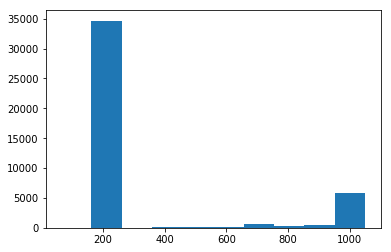

In [21]:
plt.hist(row_sz)

(array([  164., 36386.,  2292.,  2141.,  1168.,    11.,     5.,     2.,     2.,     8.]),
 array([  30. ,  188.3,  346.6,  504.9,  663.2,  821.5,  979.8, 1138.1, 1296.4, 1454.7, 1613. ]),
 <a list of 10 Patch objects>)

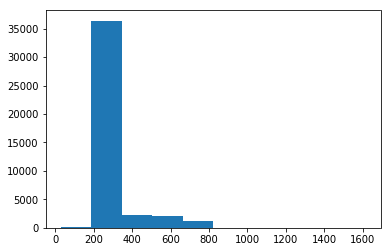

In [22]:
plt.hist(col_sz)

In [23]:
learn = ConvLearner.pretrained(arch, data)
learn.lr_find()

 89%|████████▉ | 590/660 [03:37<00:25,  2.71it/s, loss=61.5]

In [24]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 256, 256]),
                           ('output_shape', [-1, 64, 128, 128]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 128, 128]),
                           ('output_shape', [-1, 64, 128, 128]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 128, 128]),
                           ('output_shape', [-1, 64, 128, 128]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 128, 128]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 64, 

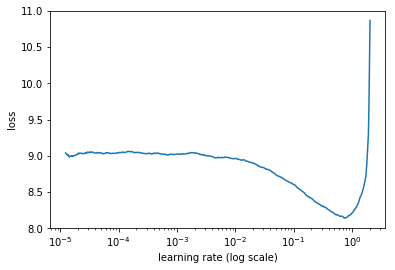

In [25]:
learn.sched.plot()

In [26]:
learn = ConvLearner.pretrained(arch, data)

In [27]:
learn.fit(0.09, n_cycle= 3)

  0%|          | 0/660 [00:00<?, ?it/s]                     


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                   
    0      6.528135   5.472426   0.158639  
    1      4.700048   3.7025     0.384144                   
    2      3.733789   2.930353   0.497525                   



[array([2.93035]), 0.4975249468507495]

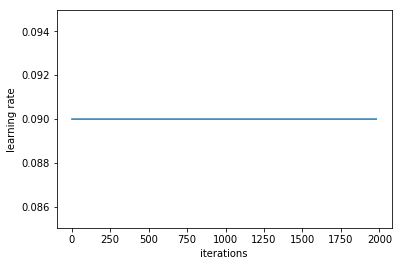

In [28]:
learn.sched.plot_lr()

In [29]:
learn.fit(0.09, n_cycle= 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      2.849464   2.449735   0.580577  
    1      2.841432   2.293802   0.595584                   
    2      2.104731   2.134262   0.61782                    
    3      2.550073   2.154348   0.611927                   
    4      2.206116   1.979177   0.638721                   
    5      1.886375   1.850079   0.66355                    
    6      1.599844   1.831926   0.66465                    



[array([1.83193]), 0.6646499568035216]

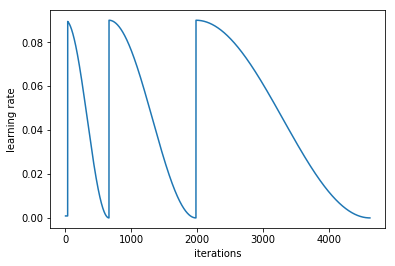

In [52]:
learn.sched.plot_lr()

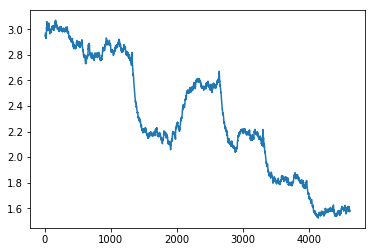

In [53]:
learn.sched.plot_loss()

In [54]:
learn.save('lastlayer_65_accuracy')

In [55]:
learn2 = ConvLearner.pretrained(arch, data, precompute=False)

In [56]:
learn2.fit(0.09, n_cycle= 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      7.401913   6.970923   0.064273  
    1      5.433174   4.297965   0.324036                   
    2      4.119515   3.605553   0.424452                   
    3      4.008521   3.09933    0.466017                   
    4      3.109564   2.518955   0.556455                   
    5      2.503513   2.241385   0.602499                   
    6      2.08388    2.206617   0.608156                   



[array([2.20662]), 0.6081558891577985]

In [58]:
lr = 0.09
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      2.748132   2.053989   0.631728  
    1      2.261785   2.073732   0.603677                   
    2      1.533787   1.335808   0.747859                   
    3      2.028026   2.0114     0.598806                   
    4      1.42798    1.319687   0.745973                   
    5      0.982066   0.956181   0.81441                     
    6      0.760534   0.916256   0.823368                    



[array([0.91626]), 0.8233676436017293]

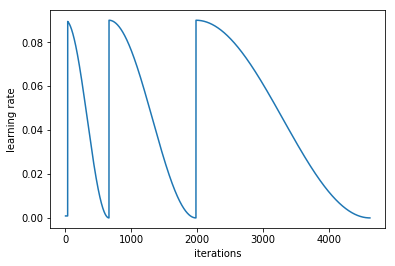

In [59]:
learn.sched.plot_lr()

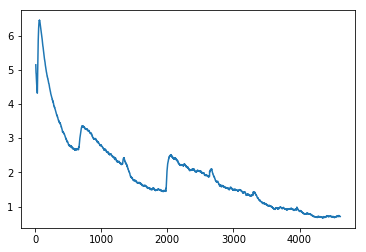

In [60]:
learn.sched.plot_loss()

In [61]:
preds, y = learn.TTA(is_test = True)

In [62]:
print(y.shape, preds.shape)

(15610, 1) (5, 15610, 4251)


In [64]:
final_preds = np.mean(preds, 0)
print(final_preds.shape)

(15610, 4251)


In [65]:
print(final_preds)

[[ -2.06313 -20.22988 -17.34443 ... -22.7929  -21.79511 -17.02754]
 [ -2.50408 -18.1519  -15.68968 ... -16.70169 -18.08002 -13.20655]
 [ -3.28976 -14.46665 -24.69413 ... -19.56592 -22.97732 -12.85744]
 ...
 [ -6.03396 -23.11186 -26.54007 ... -24.87804 -30.9293  -21.36297]
 [ -4.67009  -8.72255 -29.90975 ... -15.62915 -19.15195 -24.32526]
 [ -1.77048 -17.5519  -19.91888 ... -16.84391 -20.97327 -17.11535]]


In [66]:
high_probs = np.max(final_preds,1)
print(high_probs)

[-1.01518 -1.92743 -0.0787  ... -0.0155  -0.69425 -1.77048]


In [86]:
print(np.exp(high_probs))

[0.36234 0.14552 0.92432 ... 0.98462 0.49945 0.17025]


In [67]:
high_prob_index = np.argmax(final_preds,1)
print(high_prob_index)

[1299 3233 3317 ... 3329  172    0]


In [71]:
np.unique(high_prob_index, return_counts=True)

(array([   0,    1,    2, ..., 4246, 4248, 4249]),
 array([3989,   17,    5, ...,    1,    4,    4]))

In [73]:
high_prob_class = [ data.classes[index] for index in high_prob_index ]
high_prob_class

['w_4e52a49',
 'w_c263d43',
 'w_c887c63',
 'new_whale',
 'w_3af4e73',
 'w_ddad87e',
 'new_whale',
 'w_9621342',
 'w_7852bd1',
 'w_67de30b',
 'w_0b3f313',
 'w_43be268',
 'w_987a36f',
 'w_9dc6e7f',
 'w_40e3ee7',
 'new_whale',
 'new_whale',
 'w_10bea88',
 'w_3de676c',
 'w_eb0a6ed',
 'w_d11c53b',
 'w_e02fe7b',
 'w_9b401eb',
 'new_whale',
 'w_1287fbc',
 'w_d96a0cd',
 'new_whale',
 'w_5e3d9d0',
 'new_whale',
 'w_1287fbc',
 'new_whale',
 'w_9845f16',
 'w_affdf5d',
 'w_778ee6e',
 'w_33032d1',
 'w_0e4f53c',
 'w_9ea2cc3',
 'w_2cca6a1',
 'w_5dc1c2d',
 'w_0e7cb1c',
 'w_4fa1bd5',
 'w_9a8684f',
 'w_aeca19c',
 'w_a19eecd',
 'w_4f6fabd',
 'w_001ebbc',
 'w_3fcb80e',
 'w_2cb8996',
 'w_cc759cd',
 'w_9875c12',
 'w_8c1e2e4',
 'w_ac87f37',
 'w_c00534d',
 'new_whale',
 'w_9a0c14d',
 'w_f5a2610',
 'new_whale',
 'w_32602d9',
 'w_ad370e1',
 'new_whale',
 'new_whale',
 'w_2b939eb',
 'w_7294a6a',
 'w_4378542',
 'w_3076d8c',
 'w_528e753',
 'w_1eafe46',
 'w_daeb296',
 'new_whale',
 'w_6a3210a',
 'w_e158680',
 'w_f7

In [75]:
output_df = pd.DataFrame(high_prob_class, columns=['Id'])
#output_df.columns = data.classes
output_df

,Id
0,w_4e52a49
1,w_c263d43
2,w_c887c63
3,new_whale
4,w_3af4e73
5,w_ddad87e
6,new_whale
7,w_9621342
8,w_7852bd1
9,w_67de30b


In [76]:
output_df.insert(loc = 0, column = 'Image', value = [name[5:] for name in data.test_ds.fnames])
output_df.head()

,Image,Id
0,d7531cbd.jpg,w_4e52a49
1,00f8a2e9.jpg,w_c263d43
2,1f0423a1.jpg,w_c887c63
3,03c6c2eb.jpg,new_whale
4,7c2fd440.jpg,w_3af4e73


In [77]:
len(output_df)

15610

In [79]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok = True)
output_df.to_csv(f'{SUBM}subm_whale.csv.gz', compression = 'gzip', index=False)
output_df.to_csv(f'{SUBM}subm_whale.csv', index=False)

In [80]:
FileLink(f'{SUBM}subm_whale.csv.gz')

/home/paperspace/fastai/courses/dl1/data/whale/subm/subm_whale.csv.gz

In [81]:
FileLink(f'{SUBM}subm_whale.csv')

/home/paperspace/fastai/courses/dl1/data/whale/subm/subm_whale.csv

In [90]:
learn.save('first_subm_25percent')

In [91]:
learn2.save('learn2_1')

In [16]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1 )
    data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms, trn_name='merged_data', val_name='validation_data', test_name='test' )
    data = data.resize(int(sz*1.3), 'tmp')
    return data

In [12]:
# Choosing micro averaging f1 for imbalanced class problems
# 1. Micro - Imbalanced classes.
# 2. Not a multi label problem.
def f1(preds, targs):
     preds = np.argmax(preds, axis = 1)
     #targs = np.argmax(targs, axis = 1)
     return sklearn.metrics.f1_score(targs, preds, average='micro') 

In [13]:
# Use this method when you want 
# 1. Macro averaging F1 score - Fits well with balanced classes.
# 2. When output is a multi label prediction. (Otherwise, doi argmax at axis = 1 do chosse single label for a sample.)
from sklearn.metrics import f1_score
import warnings

def f1_old(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(preds, type(preds), preds)
        print(targs, type(targs), targs)
        return max([f1_score(targs, (preds>th), average='macro') for th in np.arange(start,end,step)])

In [14]:
arch = resnet34
sz = 64 #256
bs = 64
metrics=[f1]

In [17]:
data = get_data(sz = 64, bs = 64)

In [19]:
learn3 = ConvLearner.pretrained(arch, data, precompute=True, metrics = metrics)

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [41]:
learn3.lr_find()

 91%|█████████ | 599/660 [00:14<00:01, 42.63it/s, loss=40.1]

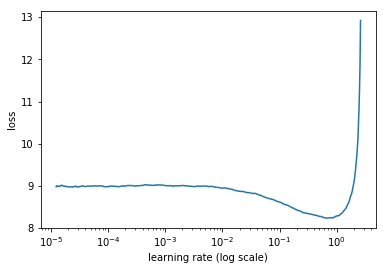

 91%|█████████ | 599/660 [00:30<00:03, 19.97it/s, loss=40.1]

In [42]:
learn3.sched.plot()

In [53]:
lr = 0.07

In [54]:
learn3.fit(lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      7.749143   7.48759    0.030644  
    1      6.180358   5.549982   0.152668                   
    2      4.99509    4.999414   0.222676                   
    3      4.899495   4.427452   0.266913                   
    4      3.869573   3.912283   0.345015                   
    5      2.988675   3.675175   0.383515                   
    6      2.526998   3.651117   0.387523                   



[array([3.65112]), 0.38752258976978077]

In [55]:
lrs = np.array([lr/9,lr/3,lr])
learn3.unfreeze()
learn3.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      3.93907    3.657109   0.386815  
    1      3.799719   3.52277    0.399701                   
    2      3.267937   3.394414   0.415102                   
    3      3.697204   3.443438   0.40638                    
    4      3.34021    3.257992   0.430738                   
    5      2.907264   3.133968   0.45596                    
    6      2.695646   3.111947   0.457374                   



[array([3.11195]), 0.45737408658756973]

In [56]:
sz = 128
learn3.set_data(get_data(sz, bs))
learn3.freeze()
learn3.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      3.79165    3.348245   0.416045  
    1      3.495253   2.937557   0.484246                   
    2      2.984595   2.788023   0.508211                   
    3      3.071803   2.698148   0.521961                   
    4      2.642059   2.503939   0.54679                    
    5      2.418811   2.386603   0.571619                   
    6      2.179592   2.36893    0.570205                   



[array([2.36893]), 0.5702050758230534]

In [57]:
lrs = np.array([lr/9,lr/3,lr])
learn3.unfreeze()
learn3.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      2.648625   2.117801   0.617428  
    1      4.01919    3.549386   0.359943                   
    2      3.015027   2.646827   0.533276                   
    3      3.001041   3.164366   0.408737                   
    4      2.304191   2.04383    0.621906                   
    5      1.77576    1.695725   0.680836                   
    6      1.511954   1.634637   0.694193                   



[array([1.63464]), 0.6941934470024358]

In [58]:
sz = 256
learn3.set_data(get_data(sz, bs))
learn3.freeze()
learn3.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      2.212683   1.79357    0.669286  
    1      1.936835   1.57514    0.706608                   
    2      1.528963   1.498272   0.719258                   
    3      1.711289   1.461428   0.720594                   
    4      1.406763   1.331247   0.750923                   
    5      1.213208   1.267966   0.761845                   
    6      1.054712   1.25317    0.762552                   



[array([1.25317]), 0.7625520546868861]

In [59]:
lrs = np.array([lr/9,lr/3,lr])
learn3.unfreeze()
learn3.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      1.165002   1.17163    0.777795  
    1      1.318128   1.267619   0.757209                   
    3      1.356441   1.55667    0.697179                   ]
    4      0.991027   1.233328   0.758309                    
    5      0.744371   0.991812   0.811817                    
    6      0.788894   0.96297    0.819675                    



[array([0.96297]), 0.8196747073151568]

In [60]:
learn3.save('learn3_1')

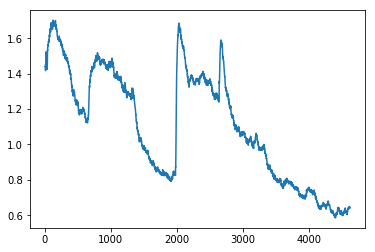

In [61]:
learn3.sched.plot_loss()

In [62]:
preds, y = learn3.TTA(is_test = True)

In [68]:
def create_csv(preds, y, subm_no, isTTA):
    if isTTA:
        final_preds = np.mean(preds, 0)
    else:
        final_preds = preds
    high_probs = np.max(final_preds,1)
    high_prob_index = np.argmax(final_preds,1)
    print(high_prob_index, high_probs, np.exp(high_probs))
    print(np.unique(high_prob_index, return_counts=True))
    high_prob_class = [ data.classes[index] for index in high_prob_index ]
    output_df = pd.DataFrame(high_prob_class, columns=['Id'])
    output_df.insert(loc = 0, column = 'Image', value = [name[5:] for name in data.test_ds.fnames])
    print(output_df.head())
    SUBM = f'{PATH}subm/'
    os.makedirs(SUBM, exist_ok = True)
    output_df.to_csv(f'{SUBM}subm_whale_'+ str(subm_no) +'.csv', index=False)
    FileLink(f'{SUBM}subm_whale_'+ str(subm_no) +'.csv')

In [69]:
create_csv(preds, y, 2, True)

[2307    0 3317 ... 3329 2144  767] [-1.60504 -2.40343 -0.01258 ... -0.00534 -1.10119 -1.7071 ] [0.20088 0.09041 0.9875  ... 0.99468 0.33247 0.18139]
(array([   0,    1,    2, ..., 4248, 4249, 4250]), array([4739,    8,    1, ...,    1,    6,    1]))
          Image         Id
0  d7531cbd.jpg  w_89e159a
1  00f8a2e9.jpg  new_whale
2  1f0423a1.jpg  w_c887c63
3  03c6c2eb.jpg  w_4e52a49
4  7c2fd440.jpg  w_44f0fa2


In [70]:
arch = resnet50
bs = 64
sz = 64
metrics = [f1]

In [71]:
data = get_data(sz = 64, bs = 64)
learn4 = ConvLearner.pretrained(arch, data, precompute=False, metrics = metrics)

In [72]:
learn4.lr_find()

 90%|█████████ | 594/660 [00:50<00:05, 11.88it/s, loss=38.2]

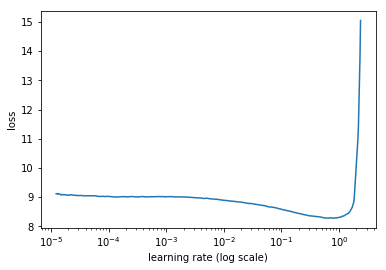

In [75]:
learn4.sched.plot()

In [76]:
lr = 0.05
learn4.freeze()
learn4.fit(lr, 3, cycle_len=1, cycle_mult=2)

  4%|▍         | 28/660 [00:03<01:11,  8.78it/s, loss=9.03]

Exception in thread Thread-68:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   f1                         
    0      7.977405   7.710124   0.023808  
    1      6.808745   6.247922   0.093895                   
    2      5.944554   5.79499    0.13876                    
    3      5.606248   5.019304   0.208219                   
    4      4.759044   4.383091   0.286006                   
    5      4.115206   4.069119   0.32765                    
    6      3.816286   4.030253   0.330793                   



[array([4.03025]), 0.33079280270291506]

In [77]:
lrs = np.array([lr/9,lr/3,lr])
learn4.unfreeze()
learn4.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      4.570624   3.979794   0.358922  
    1      4.11384    3.304787   0.416123                   
    2      3.126214   2.785328   0.527304                   
    3      3.777297   3.179307   0.423038                   
    4      3.084078   2.586462   0.534926                   
    5      2.436209   4.379849   0.294649                   
    6      2.772184   2.782111   0.51324                    



[array([2.78211]), 0.5132395694193447]

In [79]:
sz = 128
learn4.set_data(get_data(sz, bs))
learn4.freeze()
learn4.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      3.348582   2.80827    0.526833  
    1      3.052041   2.545313   0.565019                   
    2      2.57077    2.360694   0.592598                   
    3      2.836109   2.369858   0.581441                   
    4      2.500863   2.135068   0.623713                   
    5      2.090006   1.963334   0.653178                   
    6      2.025064   1.923518   0.656085                   



[array([1.92352]), 0.6560854875461617]

In [80]:
lrs = np.array([lr/9,lr/3,lr])
learn4.unfreeze()
learn4.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      1.679486   1.512236   0.724444  
    1      5.734727   5.57812    0.090831                   
    2      4.757324   4.382598   0.264713                   
    3      4.395581   4.065165   0.275713                   
    4      3.537052   3.700947   0.334564                   
    5      2.869578   6.652383   0.128388                   
    6      2.661338   2.525093   0.548047                   



[array([2.52509]), 0.5480474581598177]

In [81]:
learn4.unfreeze()
learn4.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                         
    0      2.686246   2.342455   0.580027  
    1      2.715178   3.184952   0.424059                   
    2      2.178523   2.110107   0.622378                   
    3      2.57222    20.347376  0.02255                    
    4      2.752993   298.511429 0.00165                    
    5      4.392957   3.907404   0.3238                     
    6      4.053639   3.620603   0.365836                   



[array([3.6206]), 0.365836410780231]

In [ ]:
sz = 256
learn4.set_data(get_data(sz, bs))
learn4.freeze()
learn4.fit(lr, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   f1                         
    0      3.90811    3.347611   0.435059  
    1      3.639175   3.000315   0.475367                   
    2      3.272125   2.762542   0.518583                   
    3      3.023697   2.675239   0.530447                   
    4      3.199126   2.687057   0.518347                   
    5      3.027061   2.562951   0.541997                   
    6      2.839382   2.437358   0.561562                   
    7      2.655449   2.328446   0.58482                    
    8      2.500712   2.260517   0.595663                   
    9      2.339775   2.196378   0.605956                   
    10     2.162312   2.169625   0.610749                   
 80%|████████  | 530/660 [04:04<01:00,  2.16it/s, loss=2.13]